In [1]:
# ─────────────────────────────────────────────────────────────
# 📦 IMPORTACIÓN DE LIBRERÍAS - RECONFIGURACIONES INNOVA
# ─────────────────────────────────────────────────────────────

# 📊 Procesamiento y visualización de datos
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# 🗃️ Conexión a bases de datos
import pyodbc
from sqlalchemy import create_engine

# # 🤖 Inteligencia Artificial / OpenAI
# import openai
# from openai import OpenAI

# 🧰 Utilidades del sistema
import os
import re
import base64
import re
import unicodedata
from datetime import datetime
# from dotenv import load_dotenv

# 📓 Entorno Jupyter Notebook
import nbformat
from IPython.display import display, Markdown

# 🌐 Web scraping y análisis de HTML
from bs4 import BeautifulSoup

# 📝 Conversión y renderizado de Markdown
import markdown2



In [2]:
# # Ruta al archivo .env (ajusta si tu archivo está en otra carpeta)
# load_dotenv("pass.env")
# # Acceder a las variables
# openai.api_key = os.getenv("key")
# assistant_id = os.getenv("assistant").strip()
# # (Opcional) Verifica que se cargó correctamente (no muestres en producción)
# print("🔐 Clave cargada:", openai.api_key[:10] + "...")

# client = OpenAI(api_key=openai.api_key)
# thread = client.beta.threads.create()

In [3]:
# Función para guardar gráficos automáticamente
def guardar_grafico(fig, idx):
    output_dir = "maquetas/img"
    os.makedirs(output_dir, exist_ok=True)
    ruta = os.path.join(output_dir, f"grafico_{idx}.png")
    fig.savefig(ruta, dpi=150, bbox_inches='tight')
    print(f"✅ Guardado automático: {ruta}")

In [4]:
# Consulta SQL para extraer las columnas requeridas
sql_query = """
SELECT "Código", "Nombre Ejecutivo Técnico"
FROM innova_sgp_Carga.dbo.snapshot_proyectos
WHERE Gerencia='Innovación';
"""

# Establecer la cadena de conexión a la base de datos SQL Server
connection_string = (
    "Driver={ODBC Driver 18 for SQL Server};"
    "Uid=user_seg;Pwd=user_seg;"
    "Server=ddssql11-avs\\orion;Port=1972;"
    "Database=innova_sgp_Carga;Encrypt=No;TrustServerCertificate=No"
)

# Conectar a la base de datos
con = pyodbc.connect(connection_string, timeout=10)

# Ejecutar la consulta y guardar el resultado en un DataFrame
datos_proyecto = pd.read_sql_query(sql_query, con)

# Limpiar los datos en el DataFrame
datos_proyecto = datos_proyecto.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
datos_proyecto = datos_proyecto.applymap(lambda x: None if x == "" or x == "NA" else x)

# Renombrar las columnas para que sigan las convenciones de nombres en Python
datos_proyecto.columns = datos_proyecto.columns.str.replace(" ", "_").str.replace("ñ", "n")

con.close()

# Ver el resultado
print(datos_proyecto)

c:\Users\esteban.berrios\AppData\Local\miniconda3\envs\scraping\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


            Código        Nombre_Ejecutivo_Técnico
0           SR-103                            None
1           SR-109                            None
2           SR-046                            None
3           SR-128                            None
4           SR-072                            None
...            ...                             ...
56435  17PPT-75155  WANDA JENNIFER GARCIA OLIVARES
56436   17CH-83912  WANDA JENNIFER GARCIA OLIVARES
56437  22IR-214994  WILLIAM ALFONSO CISTERNA SOLÍS
56438  20IR-129063  WILLIAM ALFONSO CISTERNA SOLÍS
56439  22IR-214977  WILLIAM ALFONSO CISTERNA SOLÍS

[56440 rows x 2 columns]


In [5]:
# Guarda en un dataframe el resultado de datos_proyecto
df = datos_proyecto.copy()

In [6]:
df = df[df["Nombre_Ejecutivo_Técnico"].isin([
    "JEREMY ANTONIO SALAS VENEGAS", 
    "JEANETTE ALEJANDRA MUNDACA DESPECCI", 
    "MARIA JOSE MORAGA CASTRO",
    "MARTA ESTHER  MINA AVENDANO", 
    "JUAN CARLOS CASTRO CABEZAS",
    "BARBARA SOL PARRAGUE GUZMAN", 
    "PAULA CAMILA DURÁN ABURTO",
    "JAIME TORRES MUÑOZ", 
    "Hugo Jara Vargas",
    "CRISTOFER ANTONIO MONSALVE SEPULVEDA", 
    "DIEGO IGNACIO VILLALOBOS RAMOS VILLALOBOS RAMOS",
    "JAVIERA DEL PILAR GOMEZ MURUA", 
    "JUAN MARTINEZ F.", 
    "PABLO GAETE HALLER",
    "CHRISTOPHER ANDRES VIVANCO BARRA", 
    "Lisette Espinoza", 
    "JUAN PABLO ALVAREZ CERECEDA",
    "SEBASTIAN  JILBERTO", 
    "YESSENNIA ESPINOZA", 
    "ALEJANDRO  LEMUS",
    "JAIME TORRES MUÑOZ", 
    "ANDRES SALVADOR LEAL VILCHES",
    "MARIA BELEN RAMIREZ BUNSTER"
])]

In [7]:
# resetea el indice al dataframe df
df.reset_index(drop=True, inplace=True)
df

,Código,Nombre_Ejecutivo_Técnico
0,22CV-207012,ALEJANDRO LEMUS
1,22CYE2-213997,ALEJANDRO LEMUS
2,22CYE2-214114,ALEJANDRO LEMUS
3,22CYE-201817,ALEJANDRO LEMUS
4,22CYE2-214055,ALEJANDRO LEMUS
...,...,...
11718,23PPT-253450,YESSENNIA ESPINOZA
11719,23SNM-253205,YESSENNIA ESPINOZA
11720,23PPT-254192,YESSENNIA ESPINOZA
11721,23CVZ-246798,YESSENNIA ESPINOZA


In [8]:
# Generar un dataframe a partir de esta ruta de acceso "C:\Users\esteban.berrios\OneDrive - corfo.cl\Documentos - SUBDIRECCIÓN DE MEJORA CONTINUA\General\Reconfiguraciones\BD Reconfiguraciones 2024.xlsx" y que solo se lea la hoja de trabajo "BD Reconfiguraciones 2024"
df_reconfiguraciones = pd.read_excel(
    r"C:\Users\esteban.berrios\OneDrive - corfo.cl\Documentos - SUBDIRECCIÓN DE MEJORA CONTINUA\Configuraciones y Reconfiguraciones\Reconfiguraciones\BD Reconfiguraciones 2024.xlsx",
    sheet_name="BBDD Reconfiguraciones"
)

c:\Users\esteban.berrios\AppData\Local\miniconda3\envs\scraping\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [9]:
# Eliminar las filas que tengan la columna vacia "Código Proyecto"
df_reconfiguraciones = df_reconfiguraciones[df_reconfiguraciones["Código Proyecto"].notna()]

In [10]:
#Obtener las siguientes columnas del dataframe df_reconfiguraciones
# "Código Proyecto", "Tipo Notificación", "N° Oficialización", "Fecha", "Año", "Instrumento", "Ejecutivo MC", "Situación (uso interno MC)", "Casuisticas errores en solicitudes"

df_reconfiguraciones = df_reconfiguraciones[
    [
        "Código Proyecto",
        "Tipo Notificación",
        "N° Oficialización",
        "Fecha",
        "Año",
        "Instrumento",
        "Ejecutivo MC",
        "Situación (uso interno MC)",
        "Casuisticas errores en solicitudes"
    ]
]

In [11]:
df_reconfiguraciones

,Código Proyecto,Tipo Notificación,N° Oficialización,Fecha,Año,Instrumento,Ejecutivo MC,Situación (uso interno MC),Casuisticas errores en solicitudes
0,21CVID2-184000,Reitemización,12096.0,2023-06-27,2023,Crea y Valida,MC,LISTA,Falta información adicional RRHH nuevos
1,21CVC2-183593,Reitemización y Reprogramación,15251.0,2023-08-21,2023,Crea y Valida,KARY,NO APLICA,NaN
2,22CVID-206781,Reitemización y Reprogramación,15376.0,2023-08-23,2023,Crea y Valida,CARO,FINALIZADA,NaN
3,21CVID-171995,Reitemización y Reprogramación,15798.0,2023-08-30,2023,Crea y Valida,CARO,FINALIZADA,NaN
4,22CVC-206581,Reitemización y Reprogramación,16870.0,2023-09-15,2023,Crea y Valida,ESTEBAN,FINALIZADA,Valores del presupuesto ya rendidos sin posibi...
...,...,...,...,...,...,...,...,...,...
719,24CVI-264677,Reitemización y Reprogramación,17028.0,2025-09-05,2025,Crea y Valida,NaN,PROCESAR,NaN
720,22CVC-206539,Reitemización y Reprogramación,17027.0,2025-09-05,2025,Crea y Valida,ESTEBAN,NO APLICA,NaN
721,24CYE-256512,Reitemización y Reprogramación,17030.0,2025-09-05,2025,Consolida y Expande,NaN,PROCESAR,NaN
722,23CVI-245563,Reitemización y Reprogramación,17029.0,2025-09-05,2025,Crea y Valida,NaN,PROCESAR,NaN


In [12]:
df_reporte = pd.merge(df,df_reconfiguraciones,left_on='Código',right_on='Código Proyecto',how='left'
)

In [13]:
df_reporte.drop(columns=['Código Proyecto'], inplace=True)

In [14]:
df_reporte

,Código,Nombre_Ejecutivo_Técnico,Tipo Notificación,N° Oficialización,Fecha,Año,Instrumento,Ejecutivo MC,Situación (uso interno MC),Casuisticas errores en solicitudes
0,22CV-207012,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,22CYE2-213997,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,22CYE2-214114,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,22CYE-201817,ALEJANDRO LEMUS,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,22CYE2-214055,ALEJANDRO LEMUS,Reitemización y Reprogramación,6378.0,2024-05-07,2024.0,Consolida y Expande,KARY,FINALIZADA,NaN
...,...,...,...,...,...,...,...,...,...,...
12057,23PPT-253450,YESSENNIA ESPINOZA,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
12058,23SNM-253205,YESSENNIA ESPINOZA,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
12059,23PPT-254192,YESSENNIA ESPINOZA,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
12060,23CVZ-246798,YESSENNIA ESPINOZA,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [15]:
# Eliminar las filas que tengan la columna vacia "Código Proyecto"
df_reporte = df_reporte[df_reporte["N° Oficialización"].notna()]

In [16]:
"""
# Explicación:
Este bloque de código asigna proyectos específicos a la ejecutiva técnica "PAULA CAMILA DURÁN ABURTO" en el DataFrame df_reporte.

"""
# Lista de proyectos a asignar a PAULA CAMILA DURÁN ABURTO
proyectos_paula = [
    "24CVCS-255709", "24CVI-264683", "24IAT-267528", "24CVCS-256022",
    "24CVCS-255764", "24CVIS-255842", "24CVCS-255984", "24CVCS-255846",
    "24CVI-265016", "24CVIS-255935", "24CVIS-255786", "24CVCS-255807",
    "24CVC-264562", "24CVIS-255922", "24CVIS-255825", "24CVI-264982",
    "24CVCS-255996", "24CVI-264653", "24CVIS-255705", "24IAT-267198",
    "24CVIS-255868", "23IATS-248301", "24CVI-264684", "24CVIS-255890",
    "24CVCS-255784", "24CVCS-255945", "24IAT-272787", "24CVI-264878",
    "24IAT-272736", "24CVIS-255832", "24CVCS-255736", "24CVIS-255755",
    "24CVC-265029", "24CVCS-256030", "23CYE-241031", "23CVI2-251478",
    "24CVCS-255822", "24CVI-264699", "24CVIS-255823"
]

# Asignar el nombre a esos proyectos en df_reporte
df_reporte.loc[df_reporte["Código"].isin(proyectos_paula), "Nombre_Ejecutivo_Técnico"] = "PAULA CAMILA DURÁN ABURTO"

In [17]:
# Se carga base  de los ejecutivos espejo que reeemplazan a Paula Durán
df_ejecutivo = pd.read_excel(
    r"C:\Users\esteban.berrios\OneDrive - corfo.cl\Documentos - SUBDIRECCIÓN DE MEJORA CONTINUA\Configuraciones y Reconfiguraciones\Reportería reconfiguraciones\Proyectos a distribuir cartera PD 2.xlsx",
    sheet_name="Hoja1",
    usecols=["Código", "Nombre Ejecutivo Espejo", "Asignación Ejecutivo"]
)

In [18]:
"""
# Explicación:
1. Se define el rango de fechas entre el 10 de junio de 2025 y el 11 de agosto de 2025.
2. Se asegura que la columna "Fecha" en el DataFrame df_reporte esté en formato datetime, manejando errores y considerando el formato día/mes/año.
3. Se crea un diccionario que mapea los códigos de proyecto a los nombres de los ejecutivos espejo.
4. Se aplica una condición para filtrar los proyectos que están en la lista de proyectos de Paula y que tienen una fecha dentro del rango especificado.
5. Finalmente, se actualiza la columna "Nombre_Ejecutivo_Técnico" en df_reporte con los nombres de los ejecutivos espejo correspondientes.
"""

# Definir el rango de fechas
fecha_inicio = pd.to_datetime("2025-06-10")
fecha_fin = pd.to_datetime("2025-08-11")

# Asegurar formato datetime en df_reporte
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce", dayfirst=True)

# Crear un diccionario {Código: Nombre Ejecutivo Espejo}
mapa_espejo = df_ejecutivo.set_index("Código")["Nombre Ejecutivo Espejo"].to_dict()

# Aplicar el reemplazo solo en los proyectos de Paula y dentro del rango de fechas
condicion = (
    df_reporte["Código"].isin(proyectos_paula) &
    (df_reporte["Fecha"].between(fecha_inicio, fecha_fin))
)

df_reporte.loc[condicion, "Nombre_Ejecutivo_Técnico"] = df_reporte.loc[condicion, "Código"].map(mapa_espejo)

C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_26044\34500419.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce", dayfirst=True)


In [19]:
"""
# Explicación:
Este bloque de código asigna los ejecutivos finales a los proyectos específicos de Paula Durán que tienen una fecha posterior al 12 de agosto de 2025,
 utilizando un mapeo basado en un DataFrame adicional que contiene las asignaciones de ejecutivos.
"""

# Definir la fecha de corte
fecha_corte = pd.to_datetime("2025-08-12")

# Crear un diccionario {Código: Asignación Ejecutivo}
mapa_final = df_ejecutivo.set_index("Código")["Asignación Ejecutivo"].to_dict()

# Condición: proyectos de Paula + fecha posterior al 12-08-2025
condicion_final = (
    df_reporte["Código"].isin(proyectos_paula) &
    (df_reporte["Fecha"] > fecha_corte)
)

# Aplicar el reemplazo con el ejecutivo final
df_reporte.loc[condicion_final, "Nombre_Ejecutivo_Técnico"] = df_reporte.loc[condicion_final, "Código"].map(mapa_final)

In [20]:
# # Descargar df_reporte a un archivo excel en Descargas con el nombre "Reporte Reconfiguraciones2.xlsx"
# df_reporte.to_excel(
#     os.path.join(os.path.expanduser("~"), "Downloads", "Reporte Reconfiguraciones2.xlsx"),
#     index=False
# )   

In [21]:


def normalizar_nombre(nombre):
    if isinstance(nombre, str):
        # Eliminar espacios invisibles y normalizar unicode
        nombre = unicodedata.normalize("NFKC", nombre)
        # Quitar espacios extras
        nombre = " ".join(nombre.split())
        # Convertir a formato título (respetando tildes)
        nombre = nombre.lower().title()
        return nombre
    return nombre

# Aplicar normalización base
df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].apply(normalizar_nombre)

# Reemplazos manuales conocidos
reemplazos = {
    "Diego Ignacio Villalobos Ramos Villalobos Ramos": "Diego Villalobos Ramos",
    "Sebastian Jilberto": "No Tiene Ejecutivo Asignado",
    "Yessenia Espinoza": "No Tiene Ejecutivo Asignado",
    "Felipe Francisco Aandueza Del Campo": "No Tiene Ejecutivo Asignado"
}

# Aplicar los reemplazos
df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].replace(reemplazos)

# También podemos normalizar la situación
df_reporte["Situación (uso interno MC)"] = df_reporte["Situación (uso interno MC)"].replace("LISTA", "FINALIZADA")


C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_26044\2492813816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].apply(normalizar_nombre)
C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_26044\2492813816.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].replace(reemplazos)
C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_26044

In [22]:
# # En la columna "Nombre_Ejecutivo_Técnico" formatear con la primera letra en mayúscula y el resto en minúscula
# df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.title()
# # Si encuentra la palabra "Diego Villalobos Ramos Villalobos Ramos" en la columna "Nombre_Ejecutivo_Técnico" reemplazar por "Diego Villalobos Ramos"
# df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Diego Ignacio Villalobos Ramos Villalobos Ramos", "Diego Villalobos Ramos", regex=False)
# df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Sebastian Jilberto", "No tiene ejecutivo asignado", regex=False)
# df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Yessenia Espinoza", "No tiene ejecutivo asignado", regex=False)
# df_reporte["Nombre_Ejecutivo_Técnico"] = df_reporte["Nombre_Ejecutivo_Técnico"].str.replace("Felipe Francisco Aandueza Del Campo", "No tiene ejecutivo asignado", regex=False)

# # Si encuentra la palabra "LISTA" en la columna "NomSituación (uso interno MC)" reemplazar por "FINALIZADA"
# df_reporte["Situación (uso interno MC)"] = df_reporte["Situación (uso interno MC)"].str.replace("LISTA", "FINALIZADA", regex=False)


In [23]:
# import time

# # Guardar el DataFrame como CSV temporal
# ruta_csv = "df_reporte.csv"
# df_reporte.to_csv(ruta_csv, index=False)

# # Subir el archivo al Assistant
# uploaded_file = client.files.create(
#     file=open(ruta_csv, "rb"),
#     purpose="assistants"
# )

# # Esperar un momento para asegurar que el archivo esté listo
# time.sleep(2)

# # Enviar el archivo y un mensaje solicitando análisis general
# mensaje_df = client.beta.threads.messages.create(
#     thread_id=thread.id,
#     role="user",
#     content=(
#         "Hola, te adjunto el archivo 'df_reporte.csv', que contiene información de reconfiguraciones "
#         "de proyectos. Por favor analiza su estructura, columnas principales, y entrega un resumen general "
#         "de los datos antes de que te haga consultas específicas."
#     ),
#     attachments=[
#         {
#             "file_id": uploaded_file.id,
#             "tools": [{"type": "code_interpreter"}]
#         }
#     ]
# )

# # Ejecutar el análisis del Assistant
# run = client.beta.threads.runs.create(
#     thread_id=thread.id,
#     assistant_id=assistant_id,
# )

# # Esperar a que el análisis esté completo
# print("⏳ Esperando que el Assistant complete la ejecución...")
# while True:
#     estado = client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id)
    
#     if estado.status == "completed":
#         print("✅ Análisis completado.")
#         break
#     elif estado.status == "failed":
#         print("❌ Falló la ejecución del Assistant.")
#         if estado.last_error:
#             print("💥 Detalle del error:", estado.last_error)
#         break
#     time.sleep(2)

# # Mostrar la respuesta del Assistant (si existe)
# mensajes = client.beta.threads.messages.list(thread_id=thread.id)
# for m in mensajes.data:
#     if m.role == "assistant":
#         print("📊 Resumen del Assistant:")
#         print(m.content[0].text.value)

In [24]:
# Descargar df_reporte en archivo csv
df_reporte.to_csv(r"C:\Users\esteban.berrios\OneDrive - corfo.cl\Documentos - SUBDIRECCIÓN DE MEJORA CONTINUA\Configuraciones y Reconfiguraciones\Reportería reconfiguraciones\df_reporte.csv", index=False)

## 🎯 Objetivo del Reporte

Este folleto visual tiene por finalidad ofrecer una visión estructurada y estratégica sobre los **procesos de reconfiguración de proyectos INNOVA** registrados en el sistema durante el período analizado. Para ello, se presentan **10 gráficos** y **3 tablas explicativas**, diseñados para facilitar la interpretación de datos complejos mediante recursos visuales y descripciones analíticas.

El objetivo central es analizar estos elementos de forma cruzada y complementaria, a fin de entregar insights estratégicos que permitan tomar decisiones informadas en torno a los siguientes ejes clave:

📈 **Evolución temporal de solicitudes**: detectar tendencias, estacionalidades y momentos críticos de mayor carga operativa.  
🧩 **Distribución por instrumento y ejecutivo**: identificar concentración de casos, perfiles especializados y oportunidades para balancear la gestión técnica.  
🧾 **Calidad técnico-administrativa**: observar la recurrencia de rectificaciones y revisar su impacto en la eficiencia de los procesos.  
❗ **Frecuencia y tipo de observaciones**: visibilizar las principales causas de rechazo o corrección, para fortalecer criterios de evaluación y lineamientos operativos.

Este enfoque integral busca no solo describir el comportamiento histórico de las reconfiguraciones, sino también entregar evidencia útil para la mejora continua de los procesos de validación, seguimiento y gestión institucional.

---

## ✅ ¿Qué Puedes Consultar?

- 📈 ¿Cómo ha evolucionado el volumen de reconfiguraciones de enero 2024 a **julio 2025**?  
- 🏷️ ¿Qué instrumentos o ejecutivos concentran la mayor carga operativa y cómo varía ese liderazgo?  
- 📅 ¿Cómo se distribuye la actividad mensual en 2025 y cuáles fueron los meses más críticos?  
- 📊 ¿Qué estados internos (PROCESAR, FINALIZADA, NO APLICA, etc.) dominan el flujo de tramitación?  
- ❌ ¿Cuáles son los tipos de notificación más frecuentes y su proporción en 2025?  
- ✅ ¿Cómo se compara la calidad documental (cartas con/sin errores) en 2025 vs. histórico?  
- ⚠️ ¿Qué patrones de errores destacan y dónde enfocar acciones preventivas?

📎 **Fuente de datos:** Registro consolidado de notificaciones de reconfiguración INNOVA CHILE
📅 **Cobertura temporal:** Enero 2024 – Julio 2025  
📌 **Segmentos clave:** Instrumento, Ejecutivo Técnico, Tipo de Notificación, Situación Interna Mejora Continua

---

## 📊 Gráficos Incluidos

1. **Tipo de solicitud de reconfiguración (2024–2025):** Distribución general de Reitemización, Reprogramación, Suspensión, etc.  
2. **Tendencia mensual por tipo de solicitud (2025):** Barras/líneas que muestran la evolución por tipo de solicitud mes a mes.  
3. **Distribución por instrumento (2025):** Reconfiguraciones según línea de financiamiento (gráfico circular).  
4. **Distribución por ejecutivo técnico (2025):** Carga operativa por ejecutivo.  
5. **Calidad administrativa de las cartas emitidas:** Cartas con vs. sin errores detectados (gráfico de barras).  
6. **Errores por instrumento (2025):** Distribución de errores según instrumento involucrado.  
7. **Errores por ejecutivo técnico (2025):** Comparativo de errores por profesional.  
8. **Evolución mensual de errores administrativos (2025):** Visualización de errores por mes.  
9. **Estados internos de tramitación (2025):** Distribución de las solicitudes según PROCESAR, FINALIZADA, NO APLICA, etc.  
10. **Distribución mensual por estado interno (2025):** Barras agrupadas por estado × mes de enero a julio.

---

## 📋 Tablas Incluidas

1. **Tabla 1 – Cartas con vs. sin observaciones (Total):**  
   Comparativo general de todas las cartas emitidas con y sin observaciones durante todo el marco temporal.

2. **Tabla 2 – Cartas con vs. sin observaciones (2025):**  
   Foco exclusivo en las cartas emitidas entre enero y julio de 2025, con énfasis en calidad técnica actual.

3. **Tabla 3 – Tipos de observaciones identificadas:**  
   Clasificación de las observaciones más frecuentes detectadas en reconfiguraciones y su peso relativo.

### 1-. **Análisis mensual de reconfiguraciones de proyectos INNOVA (Ene 2024 – Jul 2025)**

#### 📁 **Descripción del análisis**

El gráfico presenta la cantidad total de solicitudes de reconfiguración de proyectos INNOVA, notificadas mensualmente desde enero 2024 hasta julio 2025, según datos extraídos del archivo `df_reporte.csv`. Estas solicitudes pueden corresponder a reprogramaciones, reitemizaciones, suspensiones u otras modificaciones formales notificadas por ejecutivos técnicos a través de resoluciones.

#### 📅 **Meses con Mayor Actividad**

Los tres meses con mayor cantidad de reconfiguraciones notificadas son:

* **Noviembre 2024**: 55 notificaciones  
* **Junio 2025**: 52 notificaciones  
* **Diciembre 2024**: 49 notificaciones  

📌 *Esto refuerza la hipótesis de alta carga de trabajo al cierre del año calendario (noviembre-diciembre), con un nuevo peak en los últimos meses del primer semestre 2025.*

#### 📉 **Tendencia Temporal**

Se observa un patrón oscilante a lo largo del período, con alzas concentradas en tres bloques:

- **Finales de 2024**: notoriamente en noviembre y diciembre.  
- **Inicio de año 2025**: con un descenso progresivo hasta febrero.  
- **Nuevo peak en junio 2025** seguido por una leve baja en julio (44 notificaciones).

Estos ciclos podrían estar vinculados a:

* **Fechas de entrega de informes**: particularmente avances y continuidad técnica.  
* **Procesos de control y auditoría**: que impulsan reconfiguraciones formales antes del cierre de los hitos (informes técnicos, de avance y final).  

> **Observación clave:**  
> 💡 La distribución temporal de reconfiguraciones no sigue una tendencia lineal, sino que se comporta como una serie cíclica con peaks en momentos clave del año institucional.


C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_26044\524450813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_26044\524450813.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=rosados, ax=ax)


✅ Guardado automático: maquetas/img\grafico_1.png


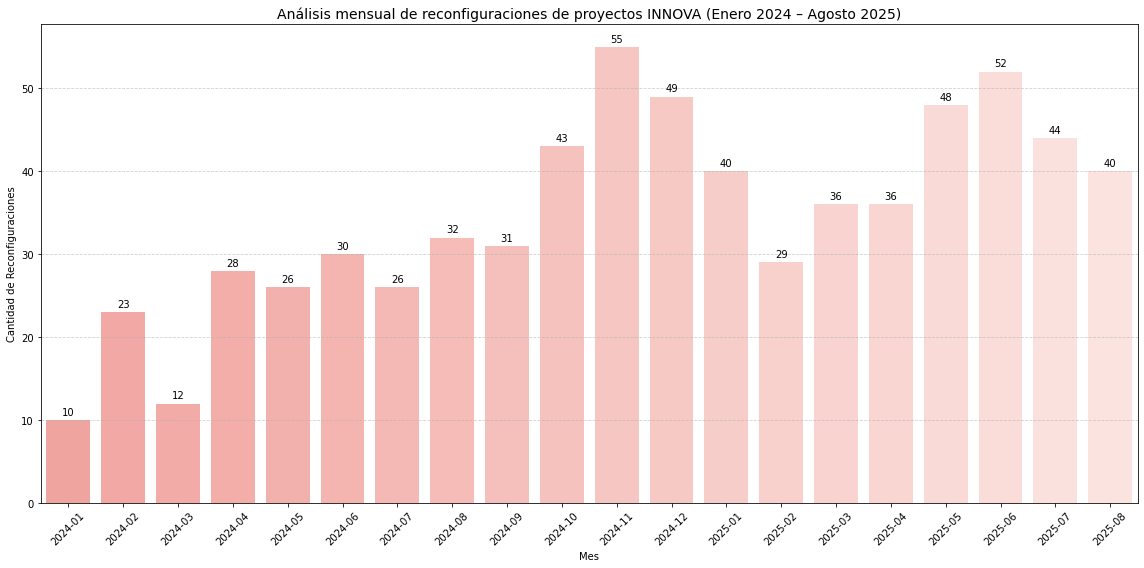

In [25]:
# --- Preparar datos
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
df_reporte = df_reporte[df_reporte["Fecha"] >= "2024-01-01"]
df_reporte = df_reporte[df_reporte["Fecha"].dt.to_period("M").astype(str) != "2025-09"]
df_reporte['Mes'] = df_reporte['Fecha'].dt.to_period('M').astype(str)

reconfiguraciones_por_mes = df_reporte['Mes'].value_counts().sort_index()
df_plot = reconfiguraciones_por_mes.reset_index()
df_plot.columns = ['Mes', 'Cantidad']

# --- Generar gradiente de rosado CORFO
base_color = mcolors.to_rgb("#FD9893")
rosados = [mcolors.to_hex(tuple(min(1, c + i * 0.015) for c in base_color)) for i in range(len(df_plot))]

# --- Graficar
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=rosados, ax=ax)

# Etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Títulos y estilo
plt.title("Análisis mensual de reconfiguraciones de proyectos INNOVA (Enero 2024 – Agosto 2025)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Cantidad de Reconfiguraciones")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# ✅ Guardar gráfico
guardar_grafico(fig, 1)
plt.show()

### 2-. **Reconfiguraciones por mes y por instrumento**

#### 🎯 **Descripción del análisis**

El gráfico de barras apiladas muestra la distribución mensual de solicitudes de reconfiguración de proyectos INNOVA desde enero 2024 hasta julio 2025, diferenciadas por tipo de instrumento. Para facilitar la visualización, se destacan solo aquellos instrumentos que representan al menos el 3 % del total acumulado; los demás se agrupan en la categoría **“Otros”**.

#### 🔍 **Hallazgos principales**

#### 🥇 **Instrumentos más activos por volumen**

- **Crea y Valida**: 356 reconfiguraciones (~66 % del total)  
  📌 Lidera ampliamente el volumen mensual durante todo el período, reflejando una alta carga operativa y dinamismo en sus proyectos.

#### 📉 **Instrumentos con menor participación o estabilidad**

- **Capital Humano**:  
  - Alcanzó un peak de 15 notificaciones en diciembre 2024.  
  - Se estabiliza entre 4 y 7 reconfiguraciones mensuales a lo largo del primer semestre 2025.

- **Consolida y Expande**:  
  - Participación baja pero persistente, con entre 1 y 7 casos mensuales.  
  - Su punto más alto fue en julio 2025 con 7 notificaciones.

- **Gestión de la Innovación**:  
  - Presencia marginal durante todo el período.  
  - Su mayor registro fue de 3 notificaciones en abril 2024.

- **Innova Alta Tecnología**:  
  - Muestra cierta intermitencia, con repuntes relevantes en noviembre 2024 y junio 2025.  
  - Alcanzó hasta 6 notificaciones en meses peak.

#### 📌 **Importancia de la categoría “Otros”**

- La categoría **“Otros”** agrupa instrumentos con menos del 3 % de participación.  
- Su comportamiento fue discreto: no superó las 3 notificaciones en ningún mes, lo que confirma su rol secundario durante el período.

> **Observación clave:**  
> 💡 La fuerte concentración de reconfiguraciones en **Crea y Valida** sugiere que este instrumento requiere atención especial en la gestión y planificación de modificaciones, tanto por volumen como por consistencia en el tiempo.

✅ Guardado automático: maquetas/img\grafico_2.png


<Figure size 1152x576 with 0 Axes>

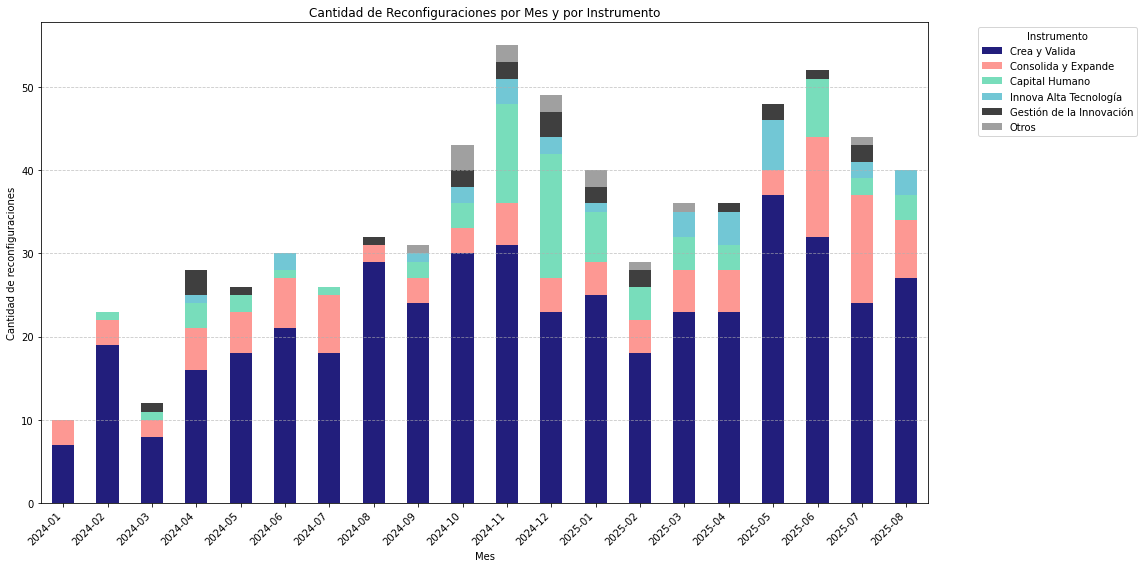

In [26]:
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
df_reporte = df_reporte[df_reporte["Fecha"] >= "2024-01-01"]
df_reporte["Mes"] = df_reporte["Fecha"].dt.to_period("M").astype(str)
# Excluir abril 2025
df_reporte = df_reporte[df_reporte['Mes'] != '2025-09']

# Calcular % total por instrumento para agrupar los que son menores a 3%
porcentaje_instrumento = df_reporte["Instrumento"].value_counts(normalize=True)
instrumentos_principales = porcentaje_instrumento[porcentaje_instrumento >= 0.03].index.tolist()

# Reemplazar los instrumentos menores a 3% por "Otros"
df_reporte["Instrumento Agrupado"] = df_reporte["Instrumento"].apply(
    lambda x: x if x in instrumentos_principales else "Otros"
)

# Mapeo específico para mantener colores consistentes
color_mapeo = {
    "Crea y Valida": "#221E7C",
    "Consolida y Expande": "#FD9893",
    "Capital Humano": "#78DDBB",
    "Gestión de la Innovación": "#3F3F3F",
    "Innova Alta Tecnología": "#72C7D5",
    "Otros": "#A0A0A0"# Más contrastante que el celeste  # si aparece este también
}

# Crear tabla cruzada
tabla_instrumentos = pd.crosstab(df_reporte["Mes"], df_reporte["Instrumento Agrupado"])

# Ordenar columnas por frecuencia
orden_columnas = tabla_instrumentos.sum().sort_values(ascending=False).index.tolist()
tabla_instrumentos = tabla_instrumentos[orden_columnas]

# Aplicar colores en el mismo orden
colores_usados = [color_mapeo.get(col, "#CCCCCC") for col in tabla_instrumentos.columns]

# Graficar
plt.figure(figsize=(16, 8), facecolor='white')
tabla_instrumentos.plot(
    kind="bar",
    stacked=True,
    color=colores_usados,
    figsize=(16, 8)
)

plt.title("Cantidad de Reconfiguraciones por Mes y por Instrumento", color='black')
plt.xlabel("Mes", color='black')
plt.ylabel("Cantidad de reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title="Instrumento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Guardar
fig = plt.gcf()
guardar_grafico(fig, 2)
plt.show()

### 3-. **Reconfiguraciones por mes en 2025 (Ene – Jul 2025)**

#### 🎯 **Descripción del análisis**  
El gráfico de columnas simples muestra el volumen total de reconfiguraciones de proyectos INNOVA notificadas durante los primeros siete meses de 2025. Se procesaron los datos del archivo `df_reporte.csv`, filtrando desde enero 2025 hasta julio 2025. Cada barra representa el total de reconfiguraciones registradas en el mes indicado.

#### 📅 **Evolución de solicitudes en 2025**  
- **Junio 2025**: 52 reconfiguraciones  
- **Mayo 2025**: 48 reconfiguraciones  
- **Julio 2025**: 44 reconfiguraciones  
- **Enero 2025**: 40 reconfiguraciones  
- **Marzo 2025**: 36 reconfiguraciones  
- **Abril 2025**: 35 reconfiguraciones  
- **Febrero 2025**: 29 reconfiguraciones  

📌 *Junio se consolida como el mes con mayor carga operativa en lo que va del año, lo que podría estar vinculado al cierre del primer semestre o la entrega de informes técnicos/financieros. En contraste, febrero sigue siendo el mes con menor actividad, probablemente debido a feriados o ajustes de planificación anual.*

#### 📌 **Observación clave**  
La distribución muestra un patrón creciente hacia mediados de año, con un **máximo en junio** y un leve descenso en julio, lo que sugiere la existencia de **ciclos operativos alineados con hitos institucionales clave**.


C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_26044\4289859097.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=colores_meses_2025)
C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_26044\4289859097.py:23: UserWarning: 
The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=colores_meses_2025)


✅ Guardado automático: maquetas/img\grafico_3.png


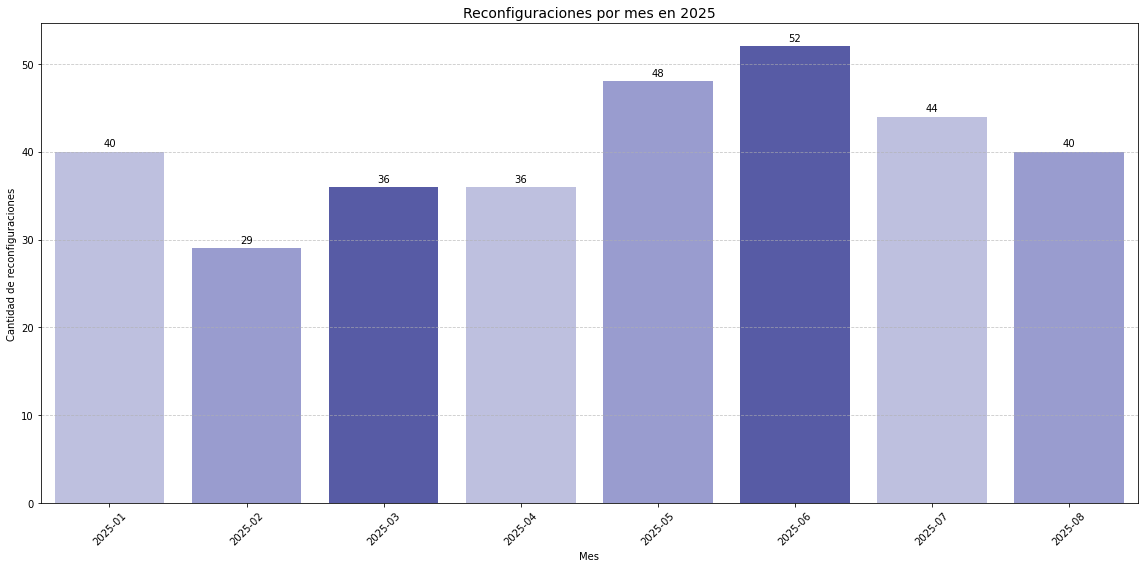

In [27]:
# Convertir la columna Fecha a datetime
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")

# Filtrar desde enero 2025 en adelante
df_reporte_2025 = df_reporte[df_reporte["Fecha"] >= "2025-01-01"].copy()

# Agrupar por mes y contar
df_reporte_2025['Mes'] = df_reporte_2025['Fecha'].dt.to_period("M").astype(str)

# Excluir mayo 2025
df_reporte_2025 = df_reporte_2025[df_reporte_2025['Mes'] != '2025-09']

# Conteo mensual
reconfiguraciones_por_mes = df_reporte_2025['Mes'].value_counts().sort_index()
df_plot = reconfiguraciones_por_mes.reset_index()
df_plot.columns = ['Mes', 'Cantidad']

# Paleta con más diferenciación
colores_meses_2025 = ["#B8BBE5", "#9094D8", "#4A4FB2"]

# Graficar
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_plot, x='Mes', y='Cantidad', palette=colores_meses_2025)

# Etiquetas sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title("Reconfiguraciones por mes en 2025", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Cantidad de reconfiguraciones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()

# ✅ Guardar
fig = ax.get_figure()
guardar_grafico(fig, 3)

plt.show()

### 4-. **Reconfiguraciones por mes y por instrumento (2025)**

#### 🎯 **Descripción del análisis**  
Este gráfico de barras apiladas presenta la evolución mensual de las reconfiguraciones de proyectos CORFO durante los primeros siete meses de 2025. Las solicitudes se agrupan por tipo de instrumento, clasificando como “Otros” aquellos con participación inferior al 3 %, para facilitar la lectura de las líneas principales.

La fuente de datos es el archivo `df_reporte.csv`, filtrado desde enero hasta julio 2025. Cada barra muestra el total de reconfiguraciones por mes, distribuidas por instrumento con codificación de color institucional.

#### 🥇 **Instrumentos que lideran en 2025**  
- **Crea y Valida** mantiene el liderazgo con una participación mensual que oscila entre el **56 %** (enero) y el **77 %** (mayo).  
  📌 Refleja su papel estructural en la operación institucional, con gran parte de las modificaciones concentradas en esta línea.

#### 🆕 **Nuevos actores relevantes**  
- **Innova Alta Tecnología** muestra un crecimiento progresivo:  
  - 1 reconfiguración en enero  
  - 3 en marzo  
  - 4 en abril  
  - 6 en mayo  
  - 5 en junio  
  Aunque su volumen sigue siendo marginal, esta tendencia sugiere adjudicaciones recientes o ajustes iniciales en proyectos tecnológicos.

📌 *El aumento sostenido en la diversidad de instrumentos, especialmente en los primeros meses del año, sugiere un ciclo activo de ajustes post-adjudicación o tras los primeros hitos técnicos.*

> **Observación clave:** Julio mantiene una alta actividad con **44 reconfiguraciones**, evidenciando que la diversidad instrumental sigue siendo amplia. *Crea y Valida* continúa liderando, pero se aprecia una mayor distribución entre instrumentos como *Consolida y Expande*, *Capital Humano* y *Otros*.

C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_26044\2745988653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reporte_2025["Mes"] = df_reporte_2025["Fecha"].dt.to_period("M").astype(str)


✅ Guardado automático: maquetas/img\grafico_4.png


<Figure size 1152x576 with 0 Axes>

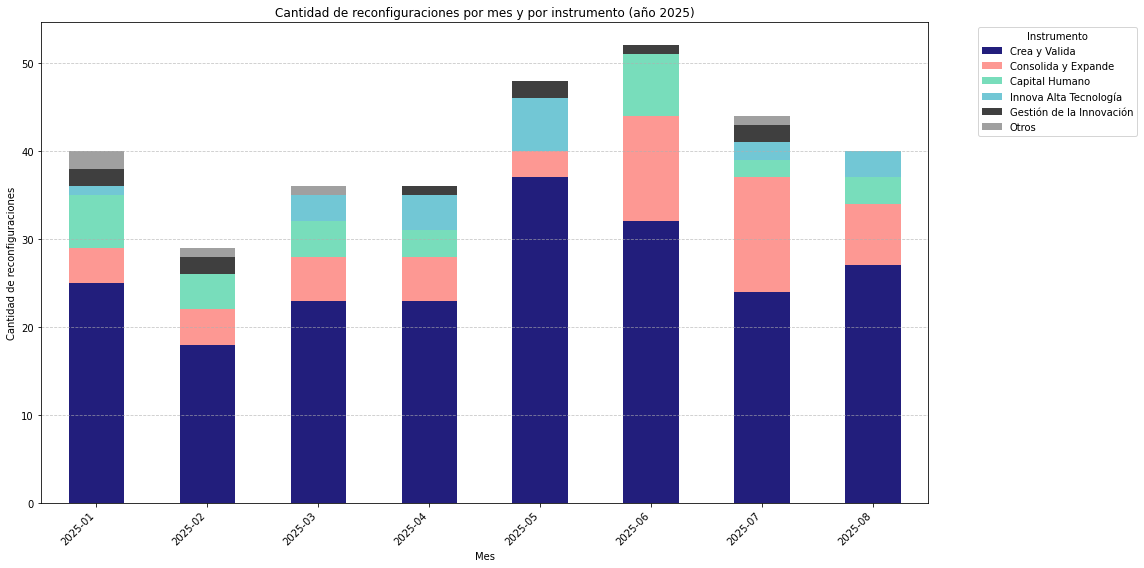

In [28]:
df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
df_reporte_2025 = df_reporte[df_reporte["Fecha"] >= "2025-01-01"]
df_reporte_2025["Mes"] = df_reporte_2025["Fecha"].dt.to_period("M").astype(str)

# Excluir abril 2025
df_reporte_2025 = df_reporte_2025[df_reporte_2025['Mes'] != '2025-09']

# Agrupamiento de instrumentos
porcentaje_instrumento = df_reporte_2025["Instrumento"].value_counts(normalize=True)
instrumentos_principales = porcentaje_instrumento[porcentaje_instrumento >= 0.03].index.tolist()

df_reporte_2025["Instrumento Agrupado"] = df_reporte_2025["Instrumento"].apply(
    lambda x: x if x in instrumentos_principales else "Otros"
)

# Tabla cruzada
tabla_instrumentos = pd.crosstab(df_reporte_2025["Mes"], df_reporte_2025["Instrumento Agrupado"])

# --- 🎨 Paleta de colores CORFO ajustada
color_mapeo = {
    "Crea y Valida": "#221E7C",
    "Consolida y Expande": "#FD9893",
    "Capital Humano": "#78DDBB",
    "Gestión de la Innovación": "#3F3F3F",
    "Innova Alta Tecnología": "#72C7D5",
    "Otros": "#A0A0A0"# Más contrastante que el celeste  # si aparece este también
}

# Ordenar columnas por frecuencia
orden_columnas = tabla_instrumentos.sum().sort_values(ascending=False).index.tolist()
tabla_instrumentos = tabla_instrumentos[orden_columnas]

# Colores ordenados
colores_usados = [color_mapeo.get(col, "#CCCCCC") for col in tabla_instrumentos.columns]

# --- 📊 Gráfico
plt.figure(figsize=(16, 8), facecolor='white')
tabla_instrumentos.plot(
    kind="bar",
    stacked=True,
    color=colores_usados,
    figsize=(16, 8)
)

plt.title("Cantidad de reconfiguraciones por mes y por instrumento (año 2025)", color='black')
plt.xlabel("Mes", color='black')
plt.ylabel("Cantidad de reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title="Instrumento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()

# ✅ Guardar automáticamente
fig = plt.gcf()
guardar_grafico(fig, 4)

plt.show()

### 5-. **Distribución de instrumentos en 2025**

#### 🎯 **Descripción del análisis**  
El gráfico circular ilustra la distribución porcentual de las solicitudes de reconfiguración de proyectos INNOVA según el instrumento de financiamiento al que pertenecen, considerando únicamente el año 2025. Se calcularon las proporciones con base en el total de notificaciones registradas, agrupando bajo “Otros” todos los instrumentos cuya participación fue inferior al 2 %, para mantener la claridad visual.

#### 🥇 **Instrumento con mayor participación**  
- **Crea y Valida** concentra el **64.1 %** del total de reconfiguraciones en 2025, reafirmando su posición como línea estratégica clave en este período.

#### 🔍 **Conclusiones clave**  
- **Consolida y Expande**: 16.2 %  
- **Capital Humano**: 8.8 %  
- **Innova Alta Tecnología**: 5.6 % — su crecimiento progresivo refuerza los hallazgos del Gráfico 4 sobre su emergencia.  
- **Gestión de la Innovación**: 3.5 %  
- **Otros**: 1.8 % — participación menor, agrupada para simplificar la visualización.

> **Observación:** La gran concentración en *Crea y Valida* evidencia una dependencia operativa fuerte de este instrumento. En paralelo, la aparición constante de *Innova Alta Tecnología* sugiere nuevas adjudicaciones o necesidades de ajuste técnico-temprano en proyectos de base tecnológica.

#### 🧩 **Complementariedad con gráficos anteriores**  
Este gráfico refuerza lo planteado en el Gráfico 4: la dominancia de *Crea y Valida* mes a mes y la incipiente relevancia de *Innova Alta Tecnología*. Esta vista consolidada permite validar que la mayoría de solicitudes se concentran en un conjunto reducido de líneas estratégicas.

✅ Guardado automático: maquetas/img\grafico_5.png


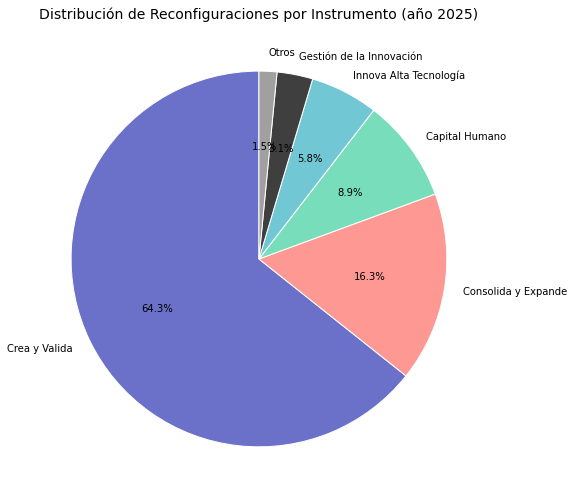

In [29]:
# Agrupar categorías con menos del 2% en "Otros"
conteo_instrumento = df_reporte_2025["Instrumento"].value_counts()
porcentajes = conteo_instrumento / conteo_instrumento.sum()

# Separar categorías principales y menores
principales = porcentajes[porcentajes >= 0.02]
otros = porcentajes[porcentajes < 0.02]

# Combinar
conteo_resumido = principales.copy()
conteo_resumido["Otros"] = otros.sum()

# 🎨 Paleta personalizada CORFO (ajustada)
color_mapeo_pie = {
        "Crea y Valida": "#6B70C8",  # 🔵 Más claro que #221E7C
        "Consolida y Expande": "#FD9893",
        "Capital Humano": "#78DDBB",
        "Gestión de la Innovación": "#3F3F3F",
        "Innova Alta Tecnología": "#72C7D5",
        "Otros": "#A0A0A0"
}

# Recalcular colores según las categorías actuales
colors = [color_mapeo_pie.get(cat, "#CCCCCC") for cat in conteo_resumido.index]

# Graficar pie chart actualizado
fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
ax.set_facecolor("white")

ax.pie(
        conteo_resumido,
        labels=conteo_resumido.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white'}
)

plt.title("Distribución de Reconfiguraciones por Instrumento (año 2025)", fontsize=14)
plt.tight_layout()

# Guardar actualizado
guardar_grafico(fig, 5)

plt.show()

### 6-. **Reconfiguraciones por ejecutivo técnico (2025)**

#### 🎯 **Descripción del análisis**  
Este gráfico de barras verticales muestra la cantidad total de solicitudes de reconfiguración gestionadas por cada ejecutivo técnico durante el año 2025 (enero a julio). Los nombres se rotaron para facilitar la lectura y se aplicó un degradado de color basado en la paleta institucional CORFO.

#### 🔍 **Concentración y distribución**  
- **Total de reconfiguraciones 2025**: 379  
- **Top 3 ejecutivos** concentran **85** reconfiguraciones, es decir, el **22.4 %** del total:

📌 *La carga operativa está moderadamente concentrada en estos perfiles, lo que podría generar riesgos de sobrecarga o cuellos de botella en la validación de reconfiguraciones.*

#### 🏗️ **Resto del equipo**  
- El restante **77.6 %** de las solicitudes (294 reconfiguraciones) está distribuido entre **14 ejecutivos técnicos**, con valores que oscilan entre **2 y 24** reconfiguraciones cada uno.

> **Observación clave:** Identificar a los ejecutivos con mayor carga permite planificar redistribuciones o refuerzos para balancear el trabajo y garantizar tiempos de respuesta óptimos en la tramitación de ajustes de proyectos INNOVA.

> **Colaboración y apoyo dentro del equipo Innova:** Muy importante ha sido el plan colaborativo recibido por el equipo de la Subdirección de Innovación Empresarial e Internacionalización para la ejecución de las solicitudes de cartas asociadas a la cartera de Paula Durán.

C:\Users\esteban.berrios\AppData\Local\Temp\ipykernel_26044\2740683542.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


✅ Guardado automático: maquetas/img\grafico_6.png


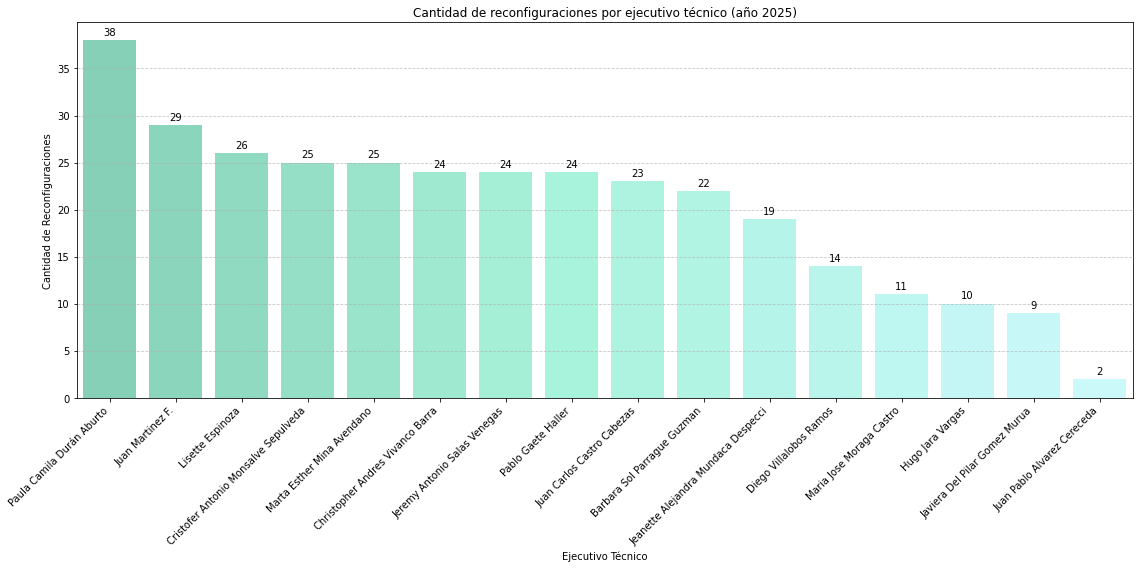

In [30]:
# --- Contar cantidad de reconfiguraciones por ejecutivo (para 2025)
conteo_ejecutivo = df_reporte_2025["Nombre_Ejecutivo_Técnico"].value_counts().reset_index()
conteo_ejecutivo.columns = ["Ejecutivo Técnico", "Cantidad"]

# --- Generar degradado desde color base CORFO #78DDBB
base_color = mcolors.to_rgb("#78DDBB")
verde_corfo = [
    mcolors.to_hex(tuple(min(1, c + i * 0.02) for c in base_color))
    for i in range(len(conteo_ejecutivo))
]

# --- Graficar
fig = plt.figure(figsize=(16, 8), facecolor='white')
ax = sns.barplot(
    data=conteo_ejecutivo,
    x="Ejecutivo Técnico",
    y="Cantidad",
    palette=verde_corfo
)

# --- Etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# --- Estilo y diseño
plt.title("Cantidad de reconfiguraciones por ejecutivo técnico (año 2025)", color='black')
plt.xlabel("Ejecutivo Técnico", color='black')
plt.ylabel("Cantidad de Reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('white')
plt.tight_layout()

# ✅ Guardar automáticamente
guardar_grafico(fig, 6)

plt.show()

### 7-.  **Reconfiguraciones por ejecutivo técnico e instrumento (2025)**

#### 🎯 **Descripción del análisis**  
Este gráfico de barras apiladas expone el número total de reconfiguraciones tramitadas por cada ejecutivo técnico durante el año 2025, desglosado por instrumento INNOVA. Se construyó a partir de una tabla cruzada entre _Nombre_Ejecutivo_Técnico_ e _Instrumento Agrupado_, ordenando los resultados según el volumen total de casos gestionados.

#### 🥇 **Ejecutivos con mayor diversidad y carga**  
📌 En todos los casos, **Crea y Valida** es el instrumento predominante. No obstante, destacan ejecutivos con presencia en **hasta 4 instrumentos distintos**, lo que revela una versatilidad clave en la operación:

- **Cristofer Antonio Monsalve Sepúlveda** (23 reconfiguraciones):  
  - Instrumentos: Crea y Valida, Consolida y Expande, Capital Humano, Gestión de la Innovación  
- **Juan Carlos Castro Cabezas** (21 reconfiguraciones):  
  - Instrumentos: Crea y Valida, Capital Humano, Gestión de la Innovación, Consolida y Expande  
- **Diego Villalobos Ramos** (12 reconfiguraciones):  
  - Instrumentos: Crea y Valida, Consolida y Expande, Gestión de la Innovación  
- **Juan Martínez F.** (24 reconfiguraciones):  
  - Instrumentos: Crea y Valida, Innova Alta Tecnología  

📌 *Aunque algunos ejecutivos concentran más volumen, otros manejan una gama más diversa de instrumentos, lo que sugiere perfiles más transversales o especializados en distintos programas.*

#### 🧩 **Implicancias estratégicas**   
- **Especialización crítica**: La predominancia de *Crea y Valida* reafirma su centralidad operativa. 
- **Plan de desarrollo**: Ejecutivos con alta diversidad podrían ser claves en procesos de mejora continua, capacitación interna o pilotajes de nuevos sistemas.

> **Nota**: Este gráfico, combinado con los anteriores, permite visualizar no solo la carga total sino también su **composición técnica**, aportando a una planificación más inteligente del equipo operativo.

✅ Guardado automático: maquetas/img\grafico_7.png


<Figure size 1152x576 with 0 Axes>

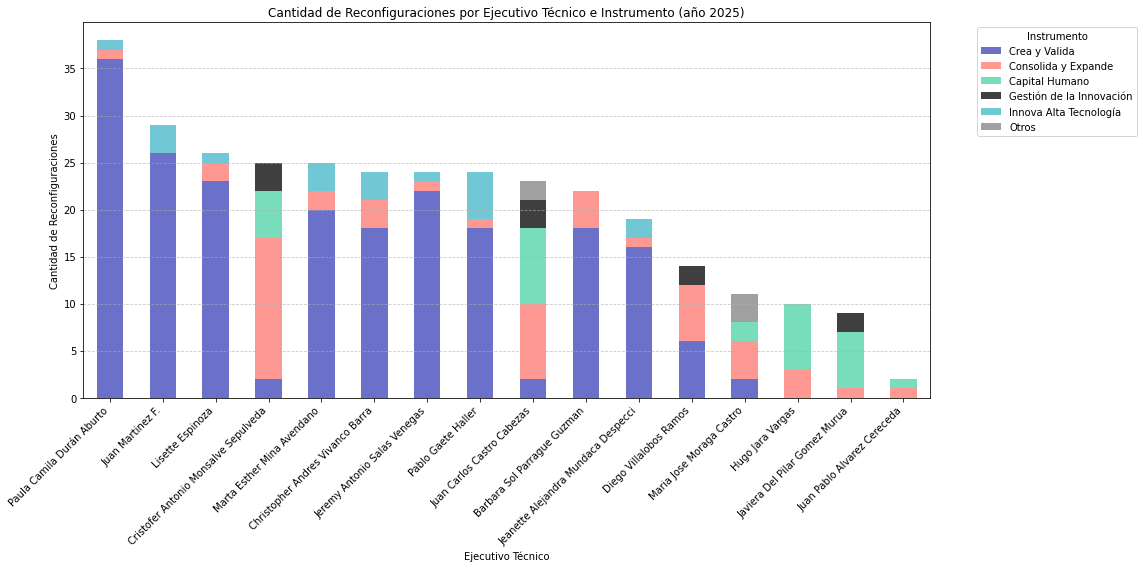

In [31]:
# Definir paleta institucional CORFO (instrumento → color)
colores_instrumentos = {
    "Crea y Valida": "#6B70C8",  # 🔵 Más claro que #221E7C
    "Consolida y Expande": "#FD9893",
    "Capital Humano": "#78DDBB",
    "Gestión de la Innovación": "#3F3F3F",
    "Innova Alta Tecnología": "#72C7D5",
    "Otros": "#A0A0A0"                  # Gris claro para categoría residual
}

# Crear tabla cruzada: ejecutivo técnico x instrumento
tabla_ejecutivo_instrumento = pd.crosstab(
    df_reporte_2025["Nombre_Ejecutivo_Técnico"],
    df_reporte_2025["Instrumento Agrupado"]
)

# Ordenar por total de reconfiguraciones
tabla_ejecutivo_instrumento = tabla_ejecutivo_instrumento.loc[
    tabla_ejecutivo_instrumento.sum(axis=1).sort_values(ascending=False).index
]

# Reordenar columnas según preferencia
column_order = [col for col in colores_instrumentos if col in tabla_ejecutivo_instrumento.columns]
tabla_ejecutivo_instrumento = tabla_ejecutivo_instrumento[column_order]

# Obtener lista de colores en el mismo orden de columnas
colores = [colores_instrumentos[col] for col in tabla_ejecutivo_instrumento.columns]

# Graficar gráfico de barras apiladas
fig = plt.figure(figsize=(16, 8), facecolor='white')
tabla_ejecutivo_instrumento.plot(
    kind="bar",
    stacked=True,
    color=colores,
    figsize=(16, 8)
)

plt.title("Cantidad de Reconfiguraciones por Ejecutivo Técnico e Instrumento (año 2025)", color='black')
plt.xlabel("Ejecutivo Técnico", color='black')
plt.ylabel("Cantidad de Reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title="Instrumento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# ✅ Guardar automáticamente
fig = plt.gcf()
guardar_grafico(fig, 7)

plt.show()

### 8-. **Reconfiguraciones por tipo de notificación (2025)**

#### 🎯 **Descripción del análisis**  
Este gráfico circular muestra la distribución relativa de los tipos de notificación utilizados en las solicitudes de reconfiguración de proyectos INNOVA durante 2025 (enero–julio). Se calcularon las proporciones con base en el total de **379 notificaciones registradas**. Se presentan todas las categorías con participación superior al 4 %, descartando aquellas residuales para mantener la claridad visual.

#### 🥇 **Tipo de notificación más frecuente**  
- **Reitemización**: 42.8 %  
- **Reprogramación**: 23.0 %  
- **Rectifica**: 11.7 %  
- **Suspensión**: 9.2 %  
- **Reitemización y Reprogramación**: 8.5 %  
- **Modificación de Proyecto**: 4.9 %

> **Observación:** *Reitemización* lidera claramente, seguida de *Reprogramación*. Las combinaciones y suspensiones, si bien menos frecuentes, reflejan ajustes simultáneos en presupuesto y cronograma, lo que evidencia una complejidad creciente en la gestión de modificaciones.

#### 🔍 **Conclusiones clave**  
- Existe una gran concentración en dos categorías principales (**Reitemización + Reprogramación = 65.8 %**), lo que indica que estos son los focos más críticos de ajustes en los proyectos.  
- La presencia de **Rectifica** (11.7 %) sugiere oportunidades de mejora en la calidad de las solicitudes iniciales o en los procesos de revisión.  
- La combinación de tipos (*Reitemización y Reprogramación*, 8.5 %) refuerza la necesidad de un abordaje coordinado entre presupuesto y cronograma.

#### 🧩 **Complementariedad con gráficos anteriores**  
Este desglose complementa lo observado en el **Gráfico 6** (carga por ejecutivo) y el **Gráfico 7** (ejecutivo × instrumento), al mostrar qué tipos de notificación dominan la carga técnica.  
Permite priorizar **capacitaciones a BENEFICIARIOS** y **ajustes operativos** en los tipos más frecuentes, especialmente en aquellas combinaciones que involucran múltiples dimensiones del proyecto.

✅ Guardado automático: maquetas/img\grafico_8.png


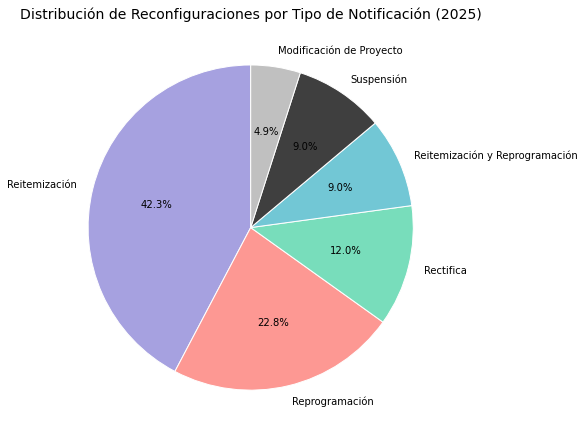

In [32]:
# Agrupar categorías con menos del 3% en "Otros"
conteo_tipo = df_reporte_2025["Tipo Notificación"].value_counts()
porcentajes = conteo_tipo / conteo_tipo.sum()

principales = porcentajes[porcentajes >= 0.04]
otros = porcentajes[porcentajes < 0.04]

conteo_resumido = principales.copy()
# conteo_resumido["Otros"] = otros.sum() # SE OPTA POR NO CONSIDERAR "Otros" EN ESTE REPORTE (JUNIO 2025)

# Detectar categoría con mayor porcentaje
categoria_max = conteo_resumido.idxmax()

# 🎨 Paleta institucional CORFO (sin repetir)
paleta_corfo = [
        "#A6A1E0",  # Morado claro institucional (para la mayor)
        "#FD9893",  # Rosado institucional
        "#78DDBB",  # Verde menta institucional
        "#72C7D5",  # Celeste institucional
        "#3F3F3F",  # Gris oscuro
        "#C0C0C0",  # Gris claro
        "#221E7C",  # Azul institucional fuerte
        "#BBBBFF"   # Lavanda de apoyo
]

# ✅ Asignar colores sin repetir
colores_dict = {}
usados = set()

for cat in conteo_resumido.index:
        if cat == categoria_max:
                colores_dict[cat] = "#A6A1E0"
                usados.add("#A6A1E0")
        else:
                for color in paleta_corfo:
                        if color not in usados:
                                colores_dict[cat] = color
                                usados.add(color)
                                break
                        else:
                                colores_dict[cat] = "#999999"  # fallback si se acaban los colores

# Lista ordenada de colores
colores = [colores_dict[cat] for cat in conteo_resumido.index]

# 📊 Gráfico pie
fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
ax.set_facecolor("white")

ax.pie(
        conteo_resumido,
        labels=conteo_resumido.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colores,
        textprops={'color': 'black'},
        wedgeprops={'edgecolor': 'white'}
)

plt.title("Distribución de Reconfiguraciones por Tipo de Notificación (2025)", color='black', fontsize=14)
plt.tight_layout()

# ✅ Guardar gráfico
guardar_grafico(fig, 8)

plt.show()

### 9-. **Estado de tramitación de Reconfiguraciones (2025)**

#### 🎯 **Descripción del análisis**  
Este gráfico de barras expone la distribución de las solicitudes de reconfiguración según su estado administrativo interno, tal como se consigna en la columna **“Situación (uso interno MC)”**, para el período enero–julio 2025.

#### ✅ **Análisis de Gestión**  
- **FINALIZADA**: 174 solicitudes (**61.3 %**) — refleja el cierre exitoso de más de la mitad de los casos.  
- **PROCESAR**: 6 solicitudes (**2.1 %**) — que no han sido gestionadas.  
- **NO APLICA**: 73 solicitudes (**25.7 %**) — incluye anulaciones, duplicidades o casos fuera de alcance.  
- **NO GESTIONABLE**: 18 solicitudes (**6.3 %**) — casos cerrados sin resolución favorable.  
- **PENDIENTE REVISIÓN FINANCIERA**: 13 solicitudes (**4.6 %**) — enviadas al área de Seguimiento Financiero.

📌 *Casos pendientes o no gestionables suman 31 (**13 %**) y requieren intervención o monitoreo.*

#### 🔍 **Observaciones clave**  
- La categoría **NO APLICA** representa más de una cuarta parte del total, lo que sugiere oportunidades de mejora en la **etapa de ingreso** o definición inicial de las solicitudes.  
- El **61.3 %** de los casos está tramitado, lo cual es positivo, aunque todavía perfectible.  
- Los estados **NO GESTIONABLE** y **PENDIENTE REVISIÓN FINANCIERA** deben ser monitoreados para evitar acumulación en el tiempo.

> **Observación clave:** Aunque la mayoría de las solicitudes ha sido cerrada, **el 8.4 %** (24 cartas) siguen activas o sin resolución, lo que representa una oportunidad para **agilizar procesos** y fortalecer la trazabilidad de los estados internos.

✅ Guardado automático: maquetas/img\grafico_9.png


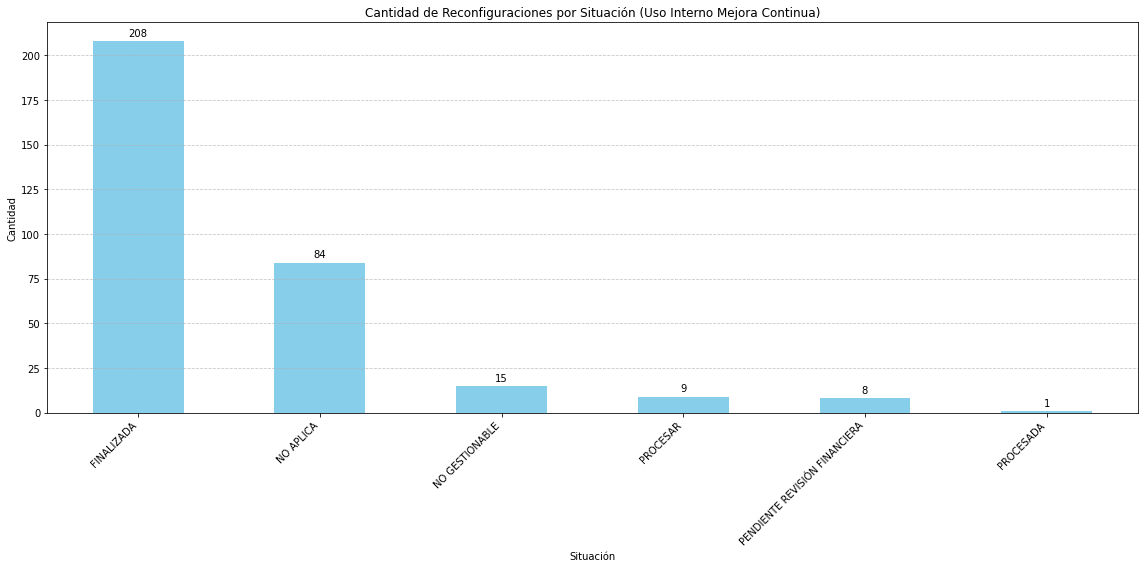

In [33]:
# Definir las categorías que queremos contar
situaciones_objetivo = [
    "PROCESAR", "NO GESTIONABLE", "NO APLICA", "PROCESADA", "PENDIENTE REVISIÓN FINANCIERA", "FINALIZADA"
]

# Filtrar y contar solo esas categorías
conteo_situaciones = df_reporte_2025["Situación (uso interno MC)"].value_counts()
conteo_filtrado = conteo_situaciones[conteo_situaciones.index.isin(situaciones_objetivo)]

# Graficar el conteo filtrado en un gráfico de barras
fig, ax = plt.subplots(figsize=(16, 8), facecolor='white')
bars = conteo_filtrado.plot(kind='bar', color='skyblue', ax=ax)

plt.title("Cantidad de Reconfiguraciones por Situación (Uso Interno Mejora Continua)", color='black')
plt.xlabel("Situación", color='black')
plt.ylabel("Cantidad", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor("white")
plt.tight_layout()

# ➕ Agregar etiquetas de valor sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3, color='black')

# ✅ Guardar el gráfico como grafico_8.png
guardar_grafico(fig, 9)

plt.show()

### 10-. **Distribución de reconfiguraciones por mes y estado (2025)**

#### 🎯 **Descripción del análisis**
Este gráfico muestra cómo se distribuyen las solicitudes de reconfiguración según su estado administrativo interno (uso interno MC) a lo largo de los primeros siete meses de 2025. Se construyó a partir de una tabla cruzada entre el campo _Mes_ y las categorías seleccionadas de la columna _Situación (uso interno MC)_: **PROCESAR**, **NO GESTIONABLE**, **NO APLICA**, **PENDIENTE REVISIÓN FINANCIERA** y **FINALIZADA**.

Durante los primeros cinco meses, la proporción de casos **FINALIZADA** lidera mensualmente. A partir de junio, se incrementan los estados **NO GESTIONABLE**, **PROCESAR** y **PENDIENTE REVISIÓN FINANCIERA**, lo cual refleja un cambio en el flujo operativo.

#### 📊 **Carga técnica y oportunidad de gestión**
- **Enero 2025**: 31 finalizadas, 9 no aplica  
- **Febrero 2025**: 25 finalizadas, 4 no aplica  
- **Marzo 2025**: 20 finalizadas, 13 no aplica, 3 no gestionables  
- **Abril 2025**: 21 finalizadas, 13 no aplica, 1 pendiente  
- **Mayo 2025**: 31 finalizadas, 15 no aplica, 2 pendientes en SF
- **Junio 2025**: 25 finalizadas, 13 no aplica, 8 no gestionables, 3 procesar, 3 pendientes pendientes en SF
- **Julio 2025**: 21 finalizadas, 6 no aplica, 6 no gestionables, 3 procesar, 8 pendientes pendientes en SF

#### 🧩 **Implicancias estratégicas**
El análisis revela un **desempeño robusto hasta mayo**, con predominio de casos cerrados. Sin embargo, desde junio se observa una **diversificación de estados pendientes**, lo que puede indicar:

- Acumulación administrativa por alta demanda.
- Revisión más rigurosa o cambios en la priorización interna.
- Necesidad de refuerzo operativo o revisión del flujo de tramitación.

> **Observación clave:** La tendencia muestra una disminución relativa en reconfiguraciones **finalizadas** durante junio y julio, acompañada de un alza en solicitudes **no gestionables o pendientes de revisión**. Esto refuerza la importancia de monitorear el comportamiento operativo en la **transición al segundo semestre** para evitar cuellos de botella.

📋 Columnas disponibles: ['FINALIZADA', 'NO APLICA', 'NO GESTIONABLE', 'PENDIENTE REVISIÓN FINANCIERA', 'PROCESADA', 'PROCESAR']
✅ Guardado automático: maquetas/img\grafico_10.png


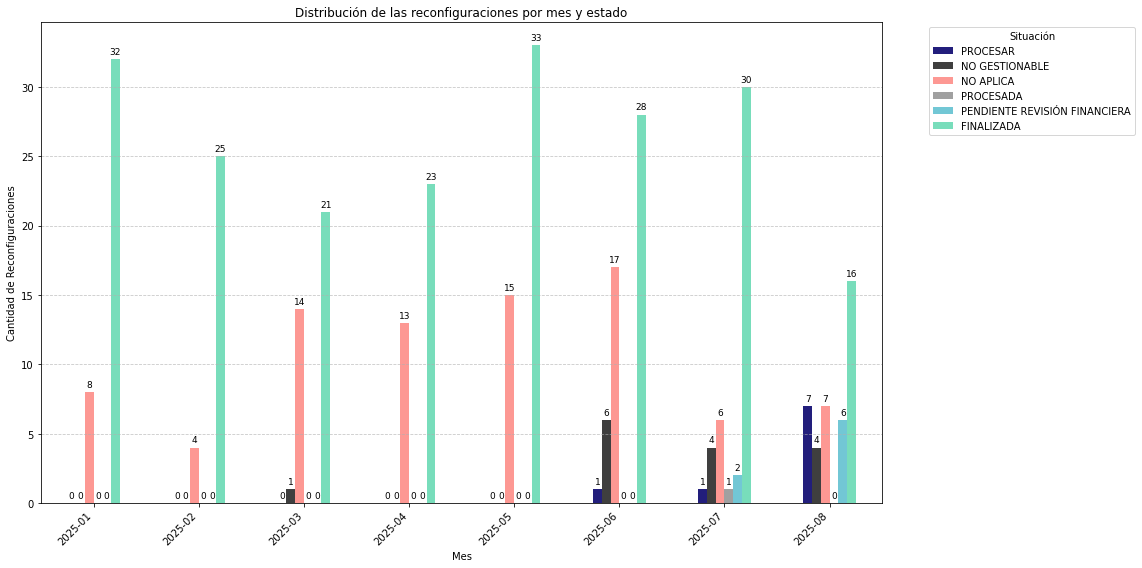

In [34]:
# Crear tabla cruzada: filas=mes, columnas=situación, valores=cantidad
tabla_situaciones = pd.crosstab(
    df_reporte_2025["Mes"],
    df_reporte_2025["Situación (uso interno MC)"]
)

# Revisar nombres reales en las columnas para evitar errores de clave
columnas_disponibles = tabla_situaciones.columns.tolist()
print("📋 Columnas disponibles:", columnas_disponibles)

# Situaciones de interés (según lo esperado)
situaciones_objetivo = ['PROCESAR', 'NO GESTIONABLE', 'NO APLICA', 'PROCESADA', 'PENDIENTE REVISIÓN FINANCIERA','FINALIZADA']

# Filtrar solo las que realmente están presentes en el DataFrame
situaciones_validas = [s for s in situaciones_objetivo if s in columnas_disponibles]
tabla_situaciones = tabla_situaciones[situaciones_validas]

# Diccionario de colores institucionales CORFO para cada situación
colores_estado = {
    "FINALIZADA": "#78DDBB",                    # Verde institucional
    "NO APLICA": "#FD9893",                     # Rosado institucional
    "NO GESTIONABLE": "#3F3F3F",                # Gris oscuro
    "PENDIENTE REVISIÓN FINANCIERA": "#72C7D5",   # Celeste
    "PROCESAR": "#221E7C",                      # Azul oscuro institucional
    "PROCESADA": "#A0A0A0"                      # Gris claro
}

# Crear gráfico de barras agrupadas con colores personalizados
fig, ax = plt.subplots(figsize=(16, 8), facecolor='white')
tabla_situaciones.plot(
    kind="bar",
    stacked=False,
    color=[colores_estado[col] for col in situaciones_validas],
    ax=ax
)

plt.title("Distribución de las reconfiguraciones por mes y estado", color='black')
plt.xlabel("Mes", color='black')
plt.ylabel("Cantidad de Reconfiguraciones", color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.legend(title="Situación", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# ➕ Etiquetas sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3, color='black')

# ✅ Guardar el gráfico
guardar_grafico(fig, 10)
plt.show()
plt.show()

### 📋 **Tabla resumen 1: cartas correctas vs. cartas con observaciones**

#### 🎯 **Descripción del análisis**  
Esta tabla resume la cantidad total y el porcentaje relativo de cartas de reconfiguración emitidas durante el período, diferenciando si presentan errores u observaciones en su tramitación. Se utilizó la columna **Casuísticas errores en solicitudes** como indicador clave: si el campo estaba vacío se clasificó como “Sin errores”, y si contenía texto, como “Con errores”.

#### 🔍 **Observaciones clave**  
- **557** cartas fueron emitidas sin observaciones formales, lo que representa el **85.8 %** del total.  
- **92** cartas presentaron algún error u observación, equivalente al **14.2 %** del total.  
- Aunque la proporción de errores es relativamente baja, sigue siendo un segmento relevante que podría optimizarse.

#### ✅ **Implicancias para la “Mejora Continua”**  
- Mantener o reforzar los controles actuales, dado el alto porcentaje de cartas correctas.  
- Implementar revisiones focalizadas o checklists para reducir el 14.2 % de cartas con errores.  
- Complementar este análisis con cruces por mes, instrumento o ejecutivo técnico para identificar patrones sistemáticos y reducir recurrencias.



In [35]:
# Clasificar los registros como "Con errores" o "Sin errores (NaN)"
df_reporte["Clasificación Errores"] = df_reporte["Casuisticas errores en solicitudes"].apply(
    lambda x: "Con observaciones" if pd.notna(x) else "Sin observaciones"
)

# Generar la tabla resumen
tabla_errores_total = df_reporte["Clasificación Errores"].value_counts().reset_index()
tabla_errores_total.columns = ["Clasificación", "Cantidad"]

# Agregar columna de porcentaje
total = tabla_errores_total["Cantidad"].sum()
tabla_errores_total["Porcentaje"] = (tabla_errores_total["Cantidad"] / total * 100).round(1).astype(str) + "%"

# Mostrar tabla con título sin índice
display(Markdown("### Tabla 1: **Tabla de relación de cantidad de cartas emitidas correctas v/s cartas con observaciones**"))
display(tabla_errores_total.style.hide(axis="index"))

### Tabla 1: **Tabla de relación de cantidad de cartas emitidas correctas v/s cartas con observaciones**

Clasificación,Cantidad,Porcentaje
Sin observaciones,594,86.1%
Con observaciones,96,13.9%


### 📋 **Tabla resumen 2: cartas emitidas con vs. sin observaciones (2025)**

#### 🎯 **Objetivo del análisis**  
Esta tabla presenta un desglose exclusivo de las cartas emitidas durante el año 2025 (**enero–julio**), clasificadas según la presencia de observaciones en el campo **Casuísticas observaciones en solicitudes**.  
Se utilizó el subconjunto `df_reporte_2025` y la columna **Clasificación observaciones**, donde **“Sin observaciones”** indica campos vacíos y **“Con observaciones”** aquellos registros con texto en la casuística.

#### ⚠️ **Alto porcentaje de emisión sin observaciones y revisión de observaciones detectadas**  
- **Total cartas 2025**: **284**  
- **Sin observaciones**: **237** (**83.5 %**)  
- **Con observaciones**: **47** (**16.5 %**)  

Aunque el **83.5 %** de cartas sin observaciones refleja un estándar de calidad sólido, el **16.5 %** restante indica áreas de mejora, especialmente en la revisión previa y los procesos de validación técnica.

#### 🔍 **Observaciones clave**  
- La proporción de **“Con observaciones”** en 2025 (**16.5 %**) es algo mayor que el promedio general, lo que sugiere **reforzar controles preventivos**.  
- Estos **47 casos** deben analizarse por **mes**, **instrumento** y **ejecutivo técnico**, para identificar patrones y reducir recurrencias.  
- Sería valioso incorporar un **seguimiento mensual** de esta métrica para evaluar el impacto de las acciones correctivas.

In [36]:
# Clasificar los registros como "Con errores" o "Sin errores (NaN)"
df_reporte_2025["Clasificación Errores"] = df_reporte_2025["Casuisticas errores en solicitudes"].apply(
    lambda x: "Con observaciones" if pd.notna(x) else "Sin observaciones"
)

# Generar la tabla resumen
tabla_errores_2025 = df_reporte_2025["Clasificación Errores"].value_counts().reset_index()
tabla_errores_2025.columns = ["Clasificación", "Cantidad"]

# Agregar columna de porcentaje
total = tabla_errores_2025["Cantidad"].sum()
tabla_errores_2025["Porcentaje"] = (tabla_errores_2025["Cantidad"] / total * 100).round(1).astype(str) + "%"

# Mostrar tabla con título y sin índice
display(Markdown("### Tabla 2: **Tabla de relación de cantidad de cartas emitidas correctas v/s cartas con errores año 2025**"))
display(tabla_errores_2025.style.hide(axis="index"))

### Tabla 2: **Tabla de relación de cantidad de cartas emitidas correctas v/s cartas con errores año 2025**

Clasificación,Cantidad,Porcentaje
Sin observaciones,274,84.3%
Con observaciones,51,15.7%


### 📋 **Tabla resumen 3: clasificación de tipos de observaciones identificadas**

#### 🎯 **Objetivo del análisis**  
Esta tabla detalla los tipos más frecuentes de observaciones detectadas en la tramitación de solicitudes de reconfiguración, categorizados según el campo **Casuísticas de observaciones en solicitudes**. El análisis permite comprender las causas más recurrentes y orientar acciones de mejora.

#### ⚠️ **Observaciones más frecuentes detectadas**
- **Falta información adicional RRHH nuevos**: 33 casos (**35.9 %**)  
- **Incidencias en el cálculo presupuestario**: 30 casos (**32.6 %**)  
- **Error en la definición de las fechas de los informes (TÉCNICOS, AVANCE Y FINAL)**: 13 casos (**14.1 %**)  
- **Valores del presupuesto ya rendidos sin posibilidad de reitemizar**: 5 casos (**5.4 %**)  
- **Falta claridad en monto a reitemizar**: 4 casos (**4.3 %**)  
- **Error en la definición de RRHH y otros gastos: pecuniarios y valorados**: 4 casos (**4.3 %**)  
- **Falta información adicional Presupuesto**: 3 casos (**3.3 %**)

#### 🔍 **Observaciones clave**
- Más del **68 %** de las observaciones se concentran en dos casuísticas críticas: **información adicional de RRHH nuevos** y **problemas en el cálculo presupuestario**.  
- Las observaciones en fechas de informes (**14.1 %**) afectan directamente la planificación técnica del proyecto.  
- Aunque las observaciones menos frecuentes suman menos del 20 %, su presencia constante exige medidas preventivas.

#### ✅ **Implicancias para la “Mejora Continua”**
- Reforzar **checklists técnicos** para asegurar la entrega completa de antecedentes de RRHH y presupuesto.  
- Implementar una **validación cruzada temprana** sobre los informes comprometidos y su cronograma.  
- **Capacitación focalizada** en definición presupuestaria y reitemización de gastos valorizados.

In [37]:
# Filtrar solo los registros con errores (no NaN)
df_con_errores = df_reporte[df_reporte["Casuisticas errores en solicitudes"].notna()]

# Contar ocurrencias por tipología de error
tabla_errores_clasificacion_total = df_con_errores["Casuisticas errores en solicitudes"].value_counts().reset_index()
tabla_errores_clasificacion_total.columns = ["Casuística de observación", "Cantidad"]

# Agregar columna de porcentaje
total_errores = tabla_errores_clasificacion_total["Cantidad"].sum()
tabla_errores_clasificacion_total["Porcentaje"] = (tabla_errores_clasificacion_total["Cantidad"] / total_errores * 100).round(1).astype(str) + "%"

# Mostrar todo el contenido de las celdas
pd.set_option("display.max_colwidth", None)

# Mostrar con título y sin índice
display(Markdown("### Tabla 3: **Tabla de clasificación de tipos de observaciones identificadas**"))
display(tabla_errores_clasificacion_total.style.hide(axis="index"))

### Tabla 3: **Tabla de clasificación de tipos de observaciones identificadas**

Casuística de observación,Cantidad,Porcentaje
Incidencias en el cálculo presupuestario,33,34.4%
Falta información adicional RRHH nuevos,33,34.4%
"Error en la definición de las fechas de los informes (TÉCNICOS, AVANCE Y FINAL)",12,12.5%
Falta claridad en monto a reitemizar,6,6.2%
Valores del presupuesto ya rendidos sin posibilidad de reitemizar,5,5.2%
Error en la definición de RRHH y otros gastos: pecuniarios y valorados,4,4.2%
Falta información adicional Presupuesto,3,3.1%


In [38]:
html_folleto_estructura_inicial = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <title>Informe de Reconfiguraciones CORFO – Año 2024-2025</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background-color: #ffffff;
            color: #1a1a1a;
            margin: 40px;
            line-height: 1.6;
        }
        .header {
            background-color: #e9f2fb;
            padding: 30px;
            border-radius: 10px;
            margin-bottom: 40px;
        }
        .header h1 {
            color: #004a99;
            font-size: 28px;
            margin: 0;
        }
        .header h3 {
            color: #2f6fa5;
            font-size: 18px;
            margin: 0;
            font-weight: normal;
        }
        h2 {
            color: #004a99;
            margin-top: 40px;
        }
        .section {
            margin-bottom: 30px;
            text-align: justify;
        }
        .content {
            border-bottom: 1px solid #004a99;
            display: flex;
            flex-wrap: wrap;
            gap: 20px;
            margin-bottom: 50px;
        }
        .grafico, .explicacion, .tabla {
            flex: 1;
            max-width: 45%;
        }
        .grafico img {
            max-width: 100%;
            border-radius: 8px;
            border: 1px solid #ccc;
        }
        .explicacion {
            text-align: justify;
            font-size: 13px;
            color: #333333;
        }
        .tabla {
            overflow-x: auto;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            font-size: 14px;
            background-color: #fff;
            box-shadow: 0 2px 5px rgba(0,0,0,0.05);
        }
        th, td {
            border: 1px solid #ccc;
            padding: 8px 10px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
        ul {
            padding-left: 20px;
        }
        ul li {
            margin-bottom: 6px;
        }
        .footer {
            text-align: center;
            font-size: 13px;
            color: #666666;
            border-top: 1px solid #ddd;
            margin-top: 60px;
            padding-top: 20px;
        }

        /* ✨ Nueva clase destacada */
        .destacada {
            background-color: #f4f9ff;
            border-left: 5px solid #004a99;
            padding: 15px;
            margin-bottom: 30px;
        }
        /* Versión móvil: reorganiza bloques para pantallas pequeñas */
        @media (max-width: 1199px) {
            .content {
                flex-direction: column;
            }

            .explicacion, .grafico, .tabla {
                order: unset;        /* se respeta orden de inserción o el especificado arriba */
                max-width: 100% !important;  /* 🔧 sobrescribe el 45% */
                width: 100%;
            }

            .grafico img {
                max-width: 100%;
                height: auto;
            }
        }
    </style>
</head>
<body>
    <div class="header">
        <h1>Informe de Reconfiguraciones de Proyectos INNOVA</h1>
        <h3>Año 2025 – Mes de Agosto. Análisis Ejecutivo</h3>
    </div>

    <!-- Este es el contenedor donde se insertará el contenido -->
    <section class="destacada"></section>
    <section class="contenido-tablas"></section>


</body>
    <div class="footer">
        Subdirección de Operaciones y Mejora Continua<br>
        Gerencia de Innovación<br>
        Corfo<br>
        2025 – Todos los derechos reservados
    </div>
</html>
"""

# # Guardar HTML base

output_path = "maquetas/html/Folleto_Final.html"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

with open(output_path, "w", encoding="utf-8") as f:
    f.write(html_folleto_estructura_inicial)

output_path

'maquetas/html/Folleto_Final.html'

In [39]:
# --- Parámetros
notebook_path = "reporte_reconfiguraciones.ipynb"
html_template_path = "maquetas/html/Folleto_Final.html"
output_path = "maquetas/html/Folleto_Final_ConGraficos.html"

# --- Cargar HTML base
with open(html_template_path, "r", encoding="utf-8") as f:
    soup = BeautifulSoup(f.read(), "html.parser")

# --- Cargar notebook
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# --- Insertar primer markdown explicativo antes de los gráficos
primer_md = None
for cell in nb.cells:
    if cell.cell_type == "markdown":
        primer_md = cell.source
        break

if primer_md:
    bloque_intro = soup.find("section", class_="destacada")
    if bloque_intro:
        bloque_intro.append(BeautifulSoup(markdown2.markdown(primer_md), "html.parser"))

# --- Namespace de tablas (¡asegúrate de definirlas antes!)
namespace = {
    "tabla_errores_total": tabla_errores_total,
    "tabla_errores_2025": tabla_errores_2025,
    "tabla_errores_clasificacion_total": tabla_errores_clasificacion_total,
}

# --- Crear secciones nuevas
seccion_graficos = soup.new_tag("section")
seccion_graficos.append(soup.new_tag("h2"))
seccion_graficos.h2.string = "📊 Análisis de Gráficos"

seccion_tablas = soup.new_tag("section")
seccion_tablas.append(soup.new_tag("h2"))
seccion_tablas.h2.string = "📋 Análisis de Tablas"

# --- Recorrer celdas del notebook
i = 0
img_index = 1

while i < len(nb.cells):
    md_cell = nb.cells[i]

    if i + 1 < len(nb.cells):
        code_cell = nb.cells[i + 1]
    else:
        break

    if md_cell.cell_type == "markdown" and code_cell.cell_type == "code":
        tiene_grafico = "plt.show" in code_cell.source
        tiene_tabla = "display(" in code_cell.source and ".style" in code_cell.source

        if tiene_grafico or tiene_tabla:
            explicacion_html = f"<div class='explicacion'>{markdown2.markdown(md_cell.source)}</div>"
            grafico_html = ""
            tabla_html = ""

            # 🔷 Gráfico
            if tiene_grafico:
                ruta_local = os.path.join("maquetas/img", f"grafico_{img_index}.png")
                if os.path.exists(ruta_local):
                    with open(ruta_local, "rb") as img_file:
                        encoded = base64.b64encode(img_file.read()).decode("utf-8")
                        grafico_html = f"""
                        <div class="grafico">
                            <img src="data:image/png;base64,{encoded}">
                        </div>
                        """

            # 🔶 Tabla
            match = re.search(r'display\((\w+)\.style', code_cell.source)
            if match:
                tabla_nombre = match.group(1)
                if tabla_nombre in namespace and hasattr(namespace[tabla_nombre], "to_html"):
                    tabla_html = f"<div class='tabla'>{namespace[tabla_nombre].to_html(index=False, escape=False)}</div>"

            # 🔽 Estructura del bloque
            bloque_html = soup.new_tag("section", **{"class": "content"})

            if tiene_grafico and grafico_html.strip():
                bloque_html.append(BeautifulSoup(grafico_html, "html.parser"))
                bloque_html.append(BeautifulSoup(explicacion_html, "html.parser"))
                seccion_graficos.append(bloque_html)

            if tiene_tabla and tabla_html.strip():
                bloque_html.append(BeautifulSoup(explicacion_html, "html.parser"))
                bloque_html.append(BeautifulSoup(tabla_html, "html.parser"))
                seccion_tablas.append(bloque_html)

            img_index += 1
            i += 2
        else:
            i += 1
    else:
        i += 1

# --- Insertar secciones en el body
soup.body.append(seccion_graficos)
soup.body.append(seccion_tablas)

# --- Guardar HTML final
os.makedirs(os.path.dirname(output_path), exist_ok=True)
with open(output_path, "w", encoding="utf-8") as f:
    f.write(str(soup))

print("✅ HTML final generado correctamente con secciones de gráficos y tablas.")

✅ HTML final generado correctamente con secciones de gráficos y tablas.


In [40]:
# # Mostrar el dataframe df_reporte_2025 filtrado por el mes de enero 2025 y ordenado por la fecha
# df_reporte_2025_filtrado_enero = df_reporte_2025[df_reporte_2025["Mes"] == "2025-01"]
# df_reporte_2025_filtrado_enero = df_reporte_2025_filtrado_enero.sort_values(by="Fecha")
# df_reporte_2025_filtrado_enero






---

In [41]:
# # 📅 Convertir la columna Fecha a tipo datetime
# df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")

# # 🧮 Clasificar los registros como "Con errores" o "Sin errores"
# df_reporte["Clasificación_Errores"] = df_reporte["Casuisticas errores en solicitudes"].apply(
#     lambda x: "Con errores" if pd.notna(x) else "Sin errores"
# )

# # 📆 Generar columna "Mes"
# df_reporte["Mes"] = df_reporte["Fecha"].dt.to_period("M").astype(str)

# # 📊 Generar tabla: errores por instrumento
# errores_por_instrumento = df_reporte[df_reporte["Clasificación_Errores"] == "Con errores"] \
#     .groupby("Instrumento")["Código"].count().reset_index(name="Con errores")

# # 📊 Total de solicitudes por instrumento
# total_por_instrumento = df_reporte.groupby("Instrumento")["Código"].count().reset_index(name="Total solicitudes")

# # 🔗 Unir ambas tablas y calcular porcentaje de errores
# errores_ratio = pd.merge(total_por_instrumento, errores_por_instrumento, on="Instrumento", how="left")
# errores_ratio["Con errores"] = errores_ratio["Con errores"].fillna(0).astype(int)
# errores_ratio["% Con errores"] = (errores_ratio["Con errores"] / errores_ratio["Total solicitudes"] * 100).round(1).astype(str) + "%"

# # 📝 Mostrar título y tabla sin índice
# from IPython.display import display, Markdown

# display(Markdown("### 🧾 Tabla: Relación de solicitudes con errores por instrumento"))
# display(errores_ratio.style.hide(axis="index"))

In [42]:
# # 📅 Convertir la columna Fecha a datetime y asegurar columna Año
# df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
# df_reporte["Año"] = df_reporte["Fecha"].dt.year

# # 🧮 Clasificar como "Con errores" o "Sin errores" si no existe ya
# if "Clasificación_Errores" not in df_reporte.columns:
#     df_reporte["Clasificación_Errores"] = df_reporte["Casuisticas errores en solicitudes"].apply(
#         lambda x: "Con errores" if pd.notna(x) else "Sin errores"
#     )

# # 🔹 Datos globales (total histórico)
# errores_total = df_reporte[df_reporte["Clasificación_Errores"] == "Con errores"] \
#     .groupby("Instrumento")["Código"].count().reset_index(name="Con errores total")

# total_total = df_reporte.groupby("Instrumento")["Código"].count().reset_index(name="Total solicitudes")

# # 🔹 Datos 2025
# df_2025 = df_reporte[df_reporte["Año"] == 2025]

# errores_2025 = df_2025[df_2025["Clasificación_Errores"] == "Con errores"] \
#     .groupby("Instrumento")["Código"].count().reset_index(name="Con errores 2025")

# total_2025 = df_2025.groupby("Instrumento")["Código"].count().reset_index(name="Total 2025")

# # 🔗 Unir todo
# tabla_comparativa = total_total.merge(errores_total, on="Instrumento", how="left") \
#     .merge(total_2025, on="Instrumento", how="left") \
#     .merge(errores_2025, on="Instrumento", how="left")

# # 🧼 Reemplazar nulos
# tabla_comparativa[["Con errores total", "Con errores 2025"]] = tabla_comparativa[
#     ["Con errores total", "Con errores 2025"]
# ].fillna(0).astype(int)

# # 📈 Cálculo de porcentajes (formato string con %)
# tabla_comparativa["% errores total"] = (
#     tabla_comparativa["Con errores total"] / tabla_comparativa["Total solicitudes"] * 100
# ).round(1).astype(str) + "%"

# tabla_comparativa["% errores 2025"] = (
#     (tabla_comparativa["Con errores 2025"] / tabla_comparativa["Total 2025"].replace(0, pd.NA)) * 100
# ).round(1).astype(str).fillna("0.0") + "%"

# # 📋 Mostrar tabla con título
# from IPython.display import display, Markdown

# display(Markdown("### 📊 Comparación de errores por instrumento: Total vs. 2025"))
# display(tabla_comparativa.style.hide(axis="index"))

In [43]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np


# # 🧽 Preprocesamiento
# df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
# df_reporte["Año"] = df_reporte["Fecha"].dt.year
# df_reporte["Clasificación_Errores"] = df_reporte["Casuisticas errores en solicitudes"].apply(
#     lambda x: "Con errores" if pd.notna(x) else "Sin errores"
# )

# # 🔹 Agrupaciones históricas
# errores_total = df_reporte[df_reporte["Clasificación_Errores"] == "Con errores"] \
#     .groupby("Instrumento")["Código"].count().reset_index(name="Con errores total")

# total_total = df_reporte.groupby("Instrumento")["Código"].count().reset_index(name="Total solicitudes")

# # 🔹 Agrupaciones 2025
# df_2025 = df_reporte[df_reporte["Año"] == 2025]
# errores_2025 = df_2025[df_2025["Clasificación_Errores"] == "Con errores"] \
#     .groupby("Instrumento")["Código"].count().reset_index(name="Con errores 2025")

# total_2025 = df_2025.groupby("Instrumento")["Código"].count().reset_index(name="Total 2025")

# # 🔗 Unir todas las tablas
# tabla = total_total.merge(errores_total, on="Instrumento", how="left") \
#                    .merge(total_2025, on="Instrumento", how="left") \
#                    .merge(errores_2025, on="Instrumento", how="left")

# # 🧼 Limpiar nulos
# tabla[["Con errores total", "Con errores 2025"]] = tabla[["Con errores total", "Con errores 2025"]].fillna(0).astype(int)

# # 📊 Crear dataframe para graficar
# grafico_df = tabla.copy()
# grafico_df["% errores total"] = grafico_df["Con errores total"] / grafico_df["Total solicitudes"] * 100
# grafico_df["% errores 2025"] = grafico_df["Con errores 2025"] / grafico_df["Total 2025"].replace(0, pd.NA) * 100

# # ─────────────────────────────────────────────
# # 🔻 GRÁFICOS: BARRAS + PIE TOTAL + PIE 2025
# # ─────────────────────────────────────────────

# fig, axs = plt.subplots(3, 1, figsize=(16, 22))

# # 1️⃣ GRÁFICO DE BARRAS COMPARATIVO
# x = np.arange(len(grafico_df["Instrumento"]))
# width = 0.35

# bars1 = axs[0].bar(x - width/2, grafico_df["% errores total"], width, label='% errores total', color="#FD9893")
# bars2 = axs[0].bar(x + width/2, grafico_df["% errores 2025"], width, label='% errores 2025', color="#72C7D5")

# axs[0].set_title("📊 Comparación de % de errores por instrumento: Total histórico vs. 2025", fontsize=14)
# axs[0].set_xlabel("Instrumento")
# axs[0].set_ylabel("% de errores")
# axs[0].set_xticks(x)
# axs[0].set_xticklabels(grafico_df["Instrumento"], rotation=45, ha='right')
# axs[0].legend()
# axs[0].grid(axis='y', linestyle='--', alpha=0.6)
# for bars in [bars1, bars2]:
#     axs[0].bar_label(bars, fmt='%.1f%%', padding=3)

# # 2️⃣ PIE CHART TOTAL HISTÓRICO
# errores_totales = tabla[tabla["Con errores total"] > 0][["Instrumento", "Con errores total"]]
# axs[1].pie(
#     errores_totales["Con errores total"],
#     labels=errores_totales["Instrumento"],
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=plt.cm.Paired.colors,
#     wedgeprops={'edgecolor': 'white'}
# )
# axs[1].set_title("🥧 Distribución de errores por instrumento (Total histórico)")

# # 3️⃣ PIE CHART 2025
# errores_2025_pie = tabla[tabla["Con errores 2025"] > 0][["Instrumento", "Con errores 2025"]]
# axs[2].pie(
#     errores_2025_pie["Con errores 2025"],
#     labels=errores_2025_pie["Instrumento"],
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=plt.cm.Pastel1.colors,
#     wedgeprops={'edgecolor': 'white'}
# )
# axs[2].set_title("🥧 Distribución de errores por instrumento (Año 2025)")

# plt.tight_layout()
# plt.show()

In [44]:
# # Ajustar el gráfico para que el eje de % errores vaya de 0 a 100%
# def graficar_tendencia_errores(df, titulo="Tendencia Temporal de Errores"):
#     df = df.copy()
#     df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
#     df = df[df["Fecha"] >= "2024-01-01"]
#     df = df[df["Fecha"].notna()]
#     df["Mes"] = df["Fecha"].dt.to_period("M").astype(str)
#     df["Clasificación_Errores"] = df["Casuisticas errores en solicitudes"].apply(
#         lambda x: "Con errores" if pd.notna(x) else "Sin errores"
#     )

#     # Agrupación
#     solicitudes_por_mes = df.groupby("Mes")["Código"].count().reset_index(name="Total solicitudes")
#     errores_por_mes = df[df["Clasificación_Errores"] == "Con errores"] \
#         .groupby("Mes")["Código"].count().reset_index(name="Con errores")

#     errores_tendencia = pd.merge(solicitudes_por_mes, errores_por_mes, on="Mes", how="left")
#     errores_tendencia["Con errores"] = errores_tendencia["Con errores"].fillna(0).astype(int)
#     errores_tendencia["% Errores"] = (errores_tendencia["Con errores"] / errores_tendencia["Total solicitudes"] * 100).round(1)

#     # Gráfico
#     fig, ax1 = plt.subplots(figsize=(14, 6))
#     ax1.bar(errores_tendencia["Mes"], errores_tendencia["Total solicitudes"], color="#D6E4F0", label="Total solicitudes")
#     ax1.set_ylabel("Total de solicitudes", color='black')
#     ax1.set_xlabel("Mes")
#     ax1.tick_params(axis='x', rotation=45)

#     # Línea de % errores
#     ax2 = ax1.twinx()
#     ax2.plot(errores_tendencia["Mes"], errores_tendencia["% Errores"], color="#FD9893", marker='o', label="% Errores")
#     ax2.set_ylabel("% de errores", color='black')
#     ax2.set_ylim(0, 100)  # Escala del 0% al 100%

#     for i, txt in enumerate(errores_tendencia["% Errores"]):
#         ax2.annotate(f"{txt}%", (errores_tendencia["Mes"][i], errores_tendencia["% Errores"][i] + 2), ha='center', fontsize=9)

#     plt.title(f"📈 {titulo}: % de errores vs total de solicitudes por mes")
#     fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.92))
#     plt.grid(axis='y', linestyle='--', alpha=0.5)
#     plt.tight_layout()
#     plt.show()

# # Ejecutar función actualizada
# graficar_tendencia_errores(df_reporte)

In [45]:
# # Asegurar que la columna de errores esté bien definida
# df_reporte["Clasificación_Errores"] = df_reporte["Casuisticas errores en solicitudes"].apply(
#     lambda x: "Con errores" if pd.notna(x) else "Sin errores"
# )

# # Calcular totales por instrumento
# total_por_instrumento = df_reporte.groupby("Instrumento")["Código"].count().reset_index(name="Total solicitudes")
# errores_por_instrumento = df_reporte[df_reporte["Clasificación_Errores"] == "Con errores"] \
#     .groupby("Instrumento")["Código"].count().reset_index(name="Con errores")

# # Unir ambos conteos y calcular % de errores
# tabla_errores = pd.merge(total_por_instrumento, errores_por_instrumento, on="Instrumento", how="left")
# tabla_errores["Con errores"] = tabla_errores["Con errores"].fillna(0).astype(int)
# tabla_errores["% Errores"] = (tabla_errores["Con errores"] / tabla_errores["Total solicitudes"] * 100).round(1)

# # Ordenar por cantidad de errores
# tabla_errores.sort_values(by="Con errores", ascending=False, inplace=True)

# # 🚨 Identificar si algún instrumento concentra más del 50% de todos los errores
# total_errores = tabla_errores["Con errores"].sum()
# tabla_errores["% del total de errores"] = (tabla_errores["Con errores"] / total_errores * 100).round(1)


# # ✅ Mostrar tabla complementaria
# from IPython.display import display, Markdown
# display(Markdown("### 📋 Tabla: Ranking de instrumentos según frecuencia y tasa de error"))
# display(tabla_errores.style.hide(axis="index"))

In [46]:
# # Filtrado de errores total
# errores_total = df_reporte[df_reporte["Clasificación_Errores"] == "Con errores"]
# conteo_total = errores_total["Instrumento"].value_counts().reset_index()
# conteo_total.columns = ["Instrumento", "Cantidad"]
# conteo_total["Porcentaje"] = (conteo_total["Cantidad"] / conteo_total["Cantidad"].sum() * 100).round(1)

# # Colores
# colores_instrumentos = {
#     "Crea y Valida": "#6B70C8",
#     "Consolida y Expande": "#FD9893",
#     "Capital Humano": "#78DDBB",
#     "Gestión de la Innovación": "#3F3F3F",
#     "Innova Alta Tecnología": "#72C7D5",
#     "Otros": "#A0A0A0"
# }
# colores = [colores_instrumentos.get(inst, "#CCCCCC") for inst in conteo_total["Instrumento"]]

# # Gráfico
# fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
# ax.set_facecolor("white")
# ax.pie(
#     conteo_total["Cantidad"],
#     labels=conteo_total["Instrumento"],
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=colores,
#     wedgeprops={'edgecolor': 'white'}
# )
# plt.title("📊 Distribución de errores por instrumento (Total histórico)", fontsize=14)
# plt.tight_layout()
# plt.show()

In [47]:
# # Filtrado año 2025
# df_reporte["Fecha"] = pd.to_datetime(df_reporte["Fecha"], errors="coerce")
# df_2025 = df_reporte[df_reporte["Fecha"].dt.year == 2025]
# errores_2025 = df_2025[df_2025["Clasificación_Errores"] == "Con errores"]
# conteo_2025 = errores_2025["Instrumento"].value_counts().reset_index()
# conteo_2025.columns = ["Instrumento", "Cantidad"]
# conteo_2025["Porcentaje"] = (conteo_2025["Cantidad"] / conteo_2025["Cantidad"].sum() * 100).round(1)

# # Colores
# colores_2025 = [colores_instrumentos.get(inst, "#CCCCCC") for inst in conteo_2025["Instrumento"]]

# # Gráfico
# fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
# ax.set_facecolor("white")
# ax.pie(
#     conteo_2025["Cantidad"],
#     labels=conteo_2025["Instrumento"],
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=colores_2025,
#     wedgeprops={'edgecolor': 'white'}
# )
# plt.title("📊 Distribución de errores por instrumento (Año 2025)", fontsize=14)
# plt.tight_layout()
# plt.show()

---

In [48]:
# # 🛠 Consulta dinámica para obtener todos los campos de la tabla
# sql_query = """
# SELECT *
# FROM innova_sgp_Carga.dbo.snapshot_proyectos
# WHERE Gerencia = 'Innovación';
# """

# # 🔐 Cadena de conexión a SQL Server
# connection_string = (
#     "Driver={ODBC Driver 18 for SQL Server};"
#     "Uid=user_seg;Pwd=user_seg;"
#     "Server=ddssql11-avs\\orion;Port=1972;"
#     "Database=innova_sgp_Carga;Encrypt=No;TrustServerCertificate=No"
# )

# # 🔌 Conectar y ejecutar la consulta
# con = pyodbc.connect(connection_string, timeout=10)
# datos_proyecto = pd.read_sql_query(sql_query, con)

# # 🧹 Limpieza del DataFrame
# datos_proyecto = datos_proyecto.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# datos_proyecto = datos_proyecto.applymap(lambda x: None if x in ["", "NA"] else x)

# # 📝 Normalización de nombres de columnas
# datos_proyecto.columns = (
#     datos_proyecto.columns
#     .str.strip()
#     .str.replace(" ", "_")
#     .str.replace("ñ", "n")
# )

# # 🔒 Cierre de conexión
# con.close()

# # 👀 Mostrar nombres de columnas obtenidas
# print("✅ Columnas disponibles en snapshot_proyectos:")
# for col in datos_proyecto.columns:
#     print(f"• {col}")

In [49]:
# # Selección de columnas deseadas (asegúrate de que estén normalizadas sin tildes)
# columnas_deseadas = [
#     "codigo", 
#     "nombre_ejecutivo_tecnico", 
#     "instrumento", 
#     "estado_proyecto", 
#     "region_de_ejecucion"
# ]

# # Mostrar solo las columnas solicitadas
# print(datos_filtrados[columnas_deseadas]

In [50]:
# # 🛠 Consulta dinámica
# sql_query = """
# SELECT *
# FROM innova_sgp_Carga.dbo.snapshot_proyectos
# WHERE Gerencia = 'Innovación';
# """

# # 🔐 Cadena de conexión
# connection_string = (
#     "Driver={ODBC Driver 18 for SQL Server};"
#     "Uid=user_seg;Pwd=user_seg;"
#     "Server=ddssql11-avs\\orion;Port=1972;"
#     "Database=innova_sgp_Carga;Encrypt=No;TrustServerCertificate=No"
# )

# # 🔌 Ejecutar consulta
# con = pyodbc.connect(connection_string, timeout=10)
# datos_proyecto = pd.read_sql_query(sql_query, con)

# # 🧹 Limpieza del DataFrame
# datos_proyecto = datos_proyecto.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# datos_proyecto = datos_proyecto.applymap(lambda x: None if x in ["", "NA"] else x)

# # 📝 Normalización de columnas
# datos_proyecto.columns = (
#     datos_proyecto.columns
#     .str.strip()
#     .str.replace(" ", "_")
#     .str.replace("ñ", "n")
# )

# # 🔒 Cerrar conexión
# con.close()

# # ✅ Filtrar por nombres de ejecutivos
# nombres_ejecutivos = [
#     "JEREMY ANTONIO SALAS VENEGAS", 
#     "JEANETTE ALEJANDRA MUNDACA DESPECCI", 
#     "MARIA JOSE MORAGA CASTRO",
#     "MARTA ESTHER  MINA AVENDANO", 
#     "JUAN CARLOS CASTRO CABEZAS",
#     "BARBARA SOL PARRAGUE GUZMAN", 
#     "PAULA CAMILA DURÁN ABURTO",
#     "JAIME TORRES MUÑOZ", 
#     "HUGO JARA VARGAS",
#     "CRISTOFER ANTONIO MONSALVE SEPULVEDA", 
#     "DIEGO IGNACIO VILLALOBOS RAMOS VILLALOBOS RAMOS",
#     "JAVIERA DEL PILAR GOMEZ MURUA", 
#     "JUAN MARTINEZ F.", 
#     "PABLO GAETE HALLER",
#     "CHRISTOPHER ANDRES VIVANCO BARRA", 
#     "LISETTE ESPINOZA", 
#     "JUAN PABLO ALVAREZ CERECEDA",
#     "SEBASTIAN  JILBERTO", 
#     "YESSENNIA ESPINOZA", 
#     "ALEJANDRO  LEMUS",
#     "ANDRES SALVADOR LEAL VILCHES"
# ]

# # Convertir a mayúsculas la columna de ejecutivos técnicos (ajusta si tiene otro nombre exacto)
# columna_ejecutivo = "Nombre_Ejecutivo_Técnico"
# datos_filtrados = datos_proyecto[
#     datos_proyecto[columna_ejecutivo].str.upper().isin(nombres_ejecutivos)
# ]

# # 👀 Mostrar resultados
# display(Markdown("### 📋 Proyectos de ejecutivos seleccionados"))
# display(datos_filtrados.style.hide(axis="index"))

In [51]:
# # Paso 1: Filtrar por estado "ADJUDICADO"
# estado_adjudicado = datos_proyecto[datos_proyecto["Estado_Proyecto"] == "ADJUDICADO"]

# # Paso 2: Lista de nombres clave (en mayúsculas para facilitar búsqueda insensible a mayúsculas/minúsculas)
# nombres_ejecutivos = [
#     "JEREMY ANTONIO SALAS VENEGAS", 
#     "JEANETTE ALEJANDRA MUNDACA DESPECCI", 
#     "MARIA JOSE MORAGA CASTRO",
#     "MARTA ESTHER  MINA AVENDANO", 
#     "JUAN CARLOS CASTRO CABEZAS",
#     "BARBARA SOL PARRAGUE GUZMAN", 
#     "PAULA CAMILA DURÁN ABURTO",
#     "JAIME TORRES MUÑOZ", 
#     "HUGO JARA VARGAS",
#     "CRISTOFER ANTONIO MONSALVE SEPULVEDA", 
#     "DIEGO IGNACIO VILLALOBOS RAMOS VILLALOBOS RAMOS",
#     "JAVIERA DEL PILAR GOMEZ MURUA", 
#     "JUAN MARTINEZ F.", 
#     "PABLO GAETE HALLER",
#     "CHRISTOPHER ANDRES VIVANCO BARRA", 
#     "LISETTE ESPINOZA", 
#     "JUAN PABLO ALVAREZ CERECEDA",
#     "SEBASTIAN  JILBERTO", 
#     "YESSENNIA ESPINOZA", 
#     "ALEJANDRO  LEMUS",
#     "ANDRES SALVADOR LEAL VILCHES"
# ]

# # Paso 3: Convertir columna de ejecutivo técnico a mayúsculas para hacer comparación insensible a mayúsculas
# datos_filtrados = estado_adjudicado[
#     estado_adjudicado["Nombre_Ejecutivo_Tecnico"].str.upper().isin(nombres_ejecutivos)
# ]

# # Mostrar resultado
# from IPython.display import Markdown, display
# display(Markdown("### 📋 Proyectos 'ADJUDICADOS' con Ejecutivos Técnicos seleccionados"))
# display(datos_filtrados.style.hide(axis="index"))

In [52]:
# # Paso 1: Filtrar por estado "ADJUDICADO"
# estado_adjudicado = datos_proyecto[datos_proyecto["Estado_Proyecto"] == "ADJUDICADO"]

# # Paso 2: Lista de nombres clave (en mayúsculas para facilitar búsqueda insensible a mayúsculas/minúsculas)
# nombres_ejecutivos = [
#     "JEREMY ANTONIO SALAS VENEGAS", 
#     "JEANETTE ALEJANDRA MUNDACA DESPECCI", 
#     "MARIA JOSE MORAGA CASTRO",
#     "MARTA ESTHER  MINA AVENDANO", 
#     "JUAN CARLOS CASTRO CABEZAS",
#     "BARBARA SOL PARRAGUE GUZMAN", 
#     "PAULA CAMILA DURÁN ABURTO",
#     "JAIME TORRES MUÑOZ", 
#     "HUGO JARA VARGAS",
#     "CRISTOFER ANTONIO MONSALVE SEPULVEDA", 
#     "DIEGO IGNACIO VILLALOBOS RAMOS VILLALOBOS RAMOS",
#     "JAVIERA DEL PILAR GOMEZ MURUA", 
#     "JUAN MARTINEZ F.", 
#     "PABLO GAETE HALLER",
#     "CHRISTOPHER ANDRES VIVANCO BARRA", 
#     "LISETTE ESPINOZA", 
#     "JUAN PABLO ALVAREZ CERECEDA",
#     "SEBASTIAN  JILBERTO", 
#     "YESSENNIA ESPINOZA", 
#     "ALEJANDRO  LEMUS",
#     "ANDRES SALVADOR LEAL VILCHES"
# ]

# # Paso 3: Convertir columna de ejecutivo técnico a mayúsculas para hacer comparación insensible a mayúsculas
# datos_filtrados = estado_adjudicado[
#     estado_adjudicado["Nombre_Ejecutivo_Tecnico"].str.upper().isin(nombres_ejecutivos)
# ]

# # Mostrar resultado
# from IPython.display import Markdown, display
# display(Markdown("### 📋 Proyectos 'ADJUDICADOS' con Ejecutivos Técnicos seleccionados"))
# display(datos_filtrados.style.hide(axis="index"))

In [53]:
# # Paso 1: Estados válidos
# estados_validos = [
#     "VIGENTE",
#     "VIGENTE(Reprogramando)",
#     "VIGENTE(Reprogramación Rechazada)"
# ]

# # Paso 2: Lista de nombres clave (en mayúsculas para facilitar búsqueda insensible a mayúsculas/minúsculas)
# nombres_ejecutivos = [
#     "JEREMY ANTONIO SALAS VENEGAS", 
#     "JEANETTE ALEJANDRA MUNDACA DESPECCI", 
#     "MARIA JOSE MORAGA CASTRO",
#     "MARTA ESTHER  MINA AVENDANO", 
#     "JUAN CARLOS CASTRO CABEZAS",
#     "BARBARA SOL PARRAGUE GUZMAN", 
#     "PAULA CAMILA DURÁN ABURTO",
#     "JAIME TORRES MUÑOZ", 
#     "HUGO JARA VARGAS",
#     "CRISTOFER ANTONIO MONSALVE SEPULVEDA", 
#     "DIEGO IGNACIO VILLALOBOS RAMOS VILLALOBOS RAMOS",
#     "JAVIERA DEL PILAR GOMEZ MURUA", 
#     "JUAN MARTINEZ F.", 
#     "PABLO GAETE HALLER",
#     "CHRISTOPHER ANDRES VIVANCO BARRA", 
#     "LISETTE ESPINOZA", 
#     "JUAN PABLO ALVAREZ CERECEDA",
#     "SEBASTIAN  JILBERTO", 
#     "YESSENNIA ESPINOZA", 
#     "ALEJANDRO  LEMUS",
#     "ANDRES SALVADOR LEAL VILCHES"
# ]

# # Paso 3: Normalizar nombre del ejecutivo a mayúsculas para la comparación
# datos_proyecto["Nombre_Ejecutivo_Tecnico_Upper"] = datos_proyecto["Nombre_Ejecutivo_Técnico"].str.upper().str.strip()

# # Paso 4: Filtrar por estado y nombre de ejecutivo
# df_estado_proyecto = datos_proyecto[
#     datos_proyecto["Estado_Proyecto"].isin(estados_validos) &
#     datos_proyecto["Nombre_Ejecutivo_Tecnico_Upper"].isin(nombres_ejecutivos)
#     & datos_proyecto["Estado_Proyecto"] == "ADJUDICADO(Configurando)"
# ][["Código", "Nombre_Ejecutivo_Técnico", "Instrumento", "Estado_Proyecto", "Región_de_Ejecución"]]

# # Paso 5: Mostrar resultado
# print(f"✅ Se encontraron {len(df_estado_proyecto)} proyectos con estado vigente y ejecutivos filtrados:")
# display(df_estado_proyecto.head())

In [54]:
# # 🧮 Contar proyectos por ejecutivo técnico (ya filtrados previamente)
# conteo_por_ejecutivo = (
#     df_estado_proyecto
#     .groupby("Nombre_Ejecutivo_Técnico")
#     .size()
#     .reset_index(name="Total_Proyectos")
#     .sort_values(by="Total_Proyectos", ascending=False)
# )

# # 📊 Mostrar tabla
# print("📋 Conteo de proyectos vigentes por ejecutivo técnico:")
# display(conteo_por_ejecutivo)